# Exploratory Data Analysis - Ignacio Fernandez

## Import Libraries

In [ ]:
# Operating System
import os
# Numerical Manipulation
import numpy as np
# Data Manipulation
import pandas as pd
# Import Visualization
import matplotlib.pyplot as plt
# Seaborn Statistical Visualization
import seaborn as sns
# Stats & Kurtosis
from scipy import stats
from scipy.stats import kurtosis
# Bokeh visualization
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# Statistical Modeling
import statsmodels.api as sm

### M.L Libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nonconformist.nc import RegressorNc
from nonconformist.icp import IcpRegressor

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Loading Data Frame

In [ ]:
# Loading DataFrame 
df = pd.read_csv('/work/nacho-clean.csv')
df

match                    competition  \
0       Real Madrid - Manchester City 1:1  Europe. UEFA Champions League   
1               Chelsea - Real Madrid 0:2  Europe. UEFA Champions League   
2             Real Madrid - Liverpool 1:0  Europe. UEFA Champions League   
3             Liverpool - Real Madrid 2:5  Europe. UEFA Champions League   
4                Real Madrid - Celtic 5:1  Europe. UEFA Champions League   
5            RB Leipzig - Real Madrid 3:2  Europe. UEFA Champions League   
6      Shakhtar Donetsk - Real Madrid 1:1  Europe. UEFA Champions League   
7            Real Madrid - RB Leipzig 2:0  Europe. UEFA Champions League   
8   Real Madrid - Manchester City 3:1 (E)  Europe. UEFA Champions League   
9       Manchester City - Real Madrid 4:3  Europe. UEFA Champions League   
10          Real Madrid - Chelsea 2:3 (E)  Europe. UEFA Champions League   
11              Chelsea - Real Madrid 1:3  Europe. UEFA Champions League   
12                  Real Madrid - PSG 3:1  Europe. UEFA Champions League   
13              Sheriff - Real Madrid 0:3  Europe. UEFA Champions League   
14     Real Madrid - Shakhtar Donetsk 2:1  Europe. UEFA Champions League   
15              Real Madrid - Sheriff 1:2  Europe. UEFA Champions League   
16       Internazionale - Real Madrid 0:1  Europe. UEFA Champions League   
17              Chelsea - Real Madrid 2:0  Europe. UEFA Champions League   
18              Real Madrid - Chelsea 1:1  Europe. UEFA Champions League   
19            Liverpool - Real Madrid 0:0  Europe. UEFA Champions League   
20            Real Madrid - Liverpool 3:1  Europe. UEFA Champions League   
21             Real Madrid - Atalanta 3:1  Europe. UEFA Champions League   
22             Atalanta - Real Madrid 0:1  Europe. UEFA Champions League   

        date position  minutes_played  total_actions  \
0     5/9/23        0               7             11   
1    4/18/23       RB              12              9   
2    3/15/23       LB              96             78   
3    2/21/23       LB              69             67   
4    11/2/22      LCB              24             16   
5   10/25/22  LB, LCB              68             50   
6   10/11/22      LCB             101             77   
7    9/14/22      LCB              94             94   
8     5/4/22  CB, LCB             134             81   
9    4/26/22      LCB              49             27   
10   4/12/22      RCB              88             44   
11    4/6/22      RCB              32             17   
12    3/9/22  LB, LCB              96             55   
13  11/24/21      LCB              30             26   
14   11/3/21       RB              28             26   
15   9/28/21       RB              65             59   
16   9/15/21       LB              94             86   
17    5/5/21     LCB3              95            104   
18   4/27/21     LCB3              94             95   
19   4/14/21      LCB              96             63   
20    4/6/21      LCB              95             53   
21   3/16/21     LCB3              95             72   
22   2/24/21      LCB              96            103   

    total_actions_successful  TAS_percent  goals  assists  ...  aerial_duels  \
0                         10           91      0        0  ...             0   
1                          9          100      0        0  ...             0   
2                         53           68      0        0  ...             1   
3                         41           61      0        0  ...             1   
4                         14           88      0        0  ...             0   
5                         40           80      0        0  ...             0   
6                         55           71      0        0  ...             6   
7                         82           87      0        0  ...             1   
8                         67           83      0        0  ...             2   
9                         21           78      0        0  ...    

In [ ]:
# DataFrame General Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match                     23 non-null     object 
 1   competition               23 non-null     object 
 2   date                      23 non-null     object 
 3   position                  23 non-null     object 
 4   minutes_played            23 non-null     int64  
 5   total_actions             23 non-null     int64  
 6   total_actions_successful  23 non-null     int64  
 7   TAS_percent               23 non-null     int64  
 8   goals                     23 non-null     int64  
 9   assists                   23 non-null     int64  
 10  shots                     23 non-null     int64  
 11  shots_on_target           23 non-null     int64  
 12  SOT_percent               23 non-null     int64  
 13  xG                        23 non-null     float64
 14  passes      

In [ ]:
# Row & Columns 
print(df.shape)

(23, 39)


In [ ]:
df.isnull().sum()

match                       0
competition                 0
date                        0
position                    0
minutes_played              0
total_actions               0
total_actions_successful    0
TAS_percent                 0
goals                       0
assists                     0
shots                       0
shots_on_target             0
SOT_percent                 0
xG                          0
passes                      0
passes_accurate             0
PA_percent                  0
long_passes                 0
long_passes_accurate        0
LPA_percent                 0
crosses                     0
crosses_accurate            0
CA_percent                  0
dribbles                    0
dribbles_successful         0
DS_percent                  0
duels                       0
duels_won                   0
DW_percent                  0
aerial_duels                0
aerial_duels_won            0
ADW_percent                 0
interceptions               0
losses    

In [ ]:
df.describe()

minutes_played  total_actions  total_actions_successful  TAS_percent  \
count       23.000000      23.000000                 23.000000    23.000000   
mean        72.086957      57.086957                 43.608696    77.391304   
std         34.585747      30.541943                 24.379088    11.515757   
min          7.000000       9.000000                  9.000000    53.000000   
25%         40.500000      26.500000                 23.000000    71.000000   
50%         94.000000      59.000000                 41.000000    77.000000   
75%         95.500000      79.500000                 61.000000    84.500000   
max        134.000000     104.000000                 88.000000   100.000000   

       goals  assists      shots  shots_on_target  SOT_percent         xG  \
count   23.0     23.0  23.000000             23.0         23.0  23.000000   
mean     0.0      0.0   0.130435              0.0          0.0   0.020000   
std      0.0      0.0   0.344350              0.0          0.0   0.085334   
min      0.0      0.0   0.000000              0.0          0.0   0.000000   
25%      0.0      0.0   0.000000              0.0          0.0   0.000000   
50%      0.0      0.0   0.000000              0.0          0.0   0.000000   
75%      0.0      0.0   0.000000              0.0          0.0   0.000000   
max      0.0      0.0   1.000000              0.0          0.0   0.410000   

       ...  aerial_duels  aerial_duels_won  ADW_percent  interceptions  \
count  ...     23.000000         23.000000    23.000000      23.000000   
mean   ...      1.913043          0.913043    30.434783       4.043478   
std    ...      2.484736          1.378835    36.477672       3.573619   
min    ...      0.000000          0.000000     0.000000       0.000000   
25%    ...      0.000000          0.000000     0.000000       1.500000   
50%    ...      1.000000          0.000000     0.000000       3.000000   
75%    ...      2.000000          1.000000    50.000000       5.500000   
max    ...     10.000000          5.000000   100.000000      14.000000   

          losses  losses_own_half  LOH_percent  recoveries  \
count  23.000000        23.000000    23.000000   23.000000   
mean    4.913043         2.652174    50.173913    6.347826   
std     2.983486         1.773766    30.721109    4.657435   
min     0.000000         0.000000     0.000000    0.000000   
25%     3.000000         1.000000    31.000000    3.500000   
50%     5.000000         3.000000    50.000000    6.000000   
75%     7.000000         4.000000    71.000000    8.500000   
max    10.000000         6.000000   100.000000   19.000000   

       recoveries_opp_half  ROPH_percent  
count            23.000000     23.000000  
mean              1.086957     14.478261  
std               1.378835     17.151384  
min               0.000000      0.000000  
25%               0.000000      0.000000  
50%               1.000000     10.000000  
75%               1.500000     25.500000  
max               5.000000     67.000000  

[8 rows x 35 columns]

### Position Relevancy

In [ ]:
# Using 'value_counts' function, you can count the frequency of each position
position_counts = df['position'].value_counts()
print(position_counts)

# If you want to see just the top 3 positions
top_three_positions = df['position'].value_counts().head(3)
print(top_three_positions)

# To get the average (mean) frequency of the top 3 positions
mean_top_three = top_three_positions.mean()
print(mean_top_three)

LCB        8
RB         3
LCB3       3
LB         3
LB, LCB    2
RCB        2
CB, LCB    1
0          1
Name: position, dtype: int64
LCB     8
RB      3
LCB3    3
Name: position, dtype: int64
4.666666666666667


- LCB: This acronym stands for "Left Centre Back". In this role, Nacho would operate in the heart of the defense, predominantly on the left side. His tasks would typically include intercepting opposition attacks, winning aerial duels, marking opponents, and clearing the ball from the defensive third. As part of the modern game's evolution, Nacho may also contribute to initiating attacks with accurate short or long passes. Key performance metrics for this role might include successful tackles, interceptions, clearances, aerial duels won, and passing accuracy.

- RB: "RB" stands for "Right Back". A more wide-ranging position, a right back operates down the right flank, contributing both defensively and offensively. This role requires Nacho to contain opposition wingers, support the right-sided midfielder, and often participate in attacking moves by delivering crosses into the box. Performance in this role can be evaluated using metrics like successful tackles, interceptions, crosses, key passes, and successful dribbles, among others.

- LCB3: This term could potentially stand for "Left Centre Back 3", indicating a role within a three-man central defense on the left side. Alongside traditional defensive duties, Nacho may have additional responsibilities in maintaining possession, distributing the ball, and providing an option for wide passes. Performance analysis in this position might involve metrics such as successful passes into the final third, long ball accuracy, and successful tackles, alongside typical defensive statistics.

- Each of these positions calls for different aspects of Nacho's skill set, leading to variations in his statistical output. By analyzing these statistics, we can gain a more comprehensive understanding of his performances, his adaptability to various tactical requirements, and his overall contributions to the team. This kind of data-driven approach is becoming increasingly central to modern football, enabling teams to make informed decisions and optimize player performances.

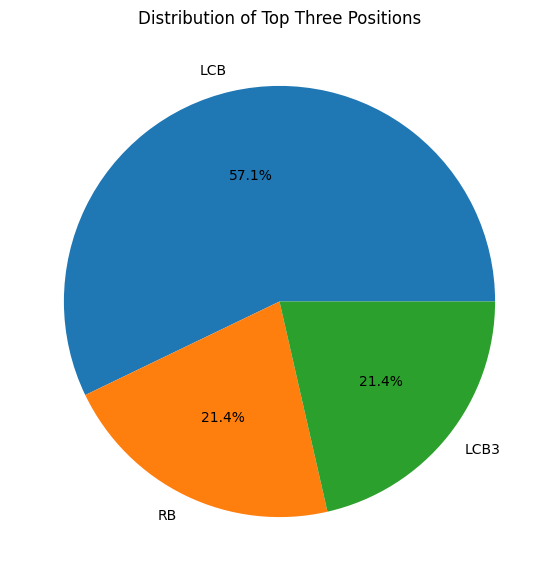

In [ ]:
# Calculate the proportions
proportions = top_three_positions / top_three_positions.sum()

# Generate the pie chart
plt.figure(figsize=(10,7))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title("Distribution of Top Three Positions")
plt.show()

## Average Minutes Played

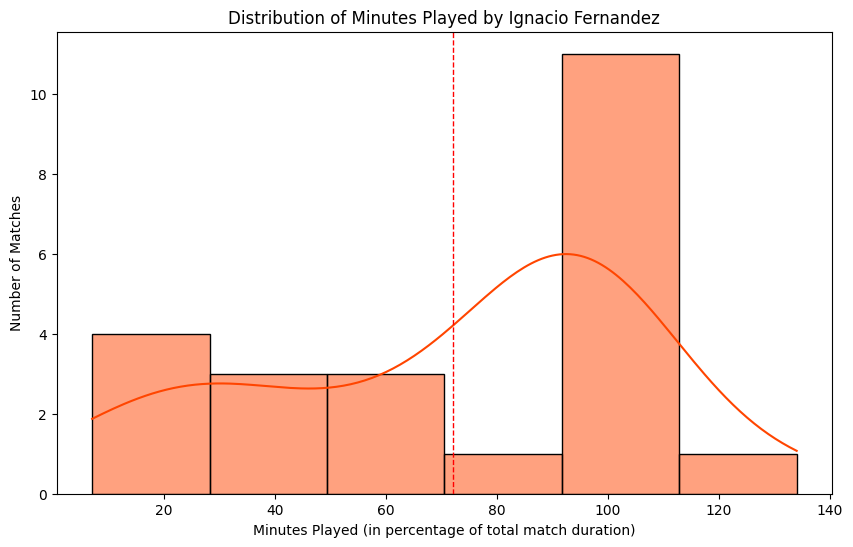

Ignacio Fernandez played on average 72.08695652173913 minutes per match.


In [ ]:
# Assume df is your DataFrame and 'minutes_played' is your column of interest
average_minutes_played = df['minutes_played'].mean()

# Plot the distribution of minutes played
plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_played'], kde=True, color='orangered')
plt.axvline(average_minutes_played, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Minutes Played by Ignacio Fernandez')
plt.xlabel('Minutes Played (in percentage of total match duration)')
plt.ylabel('Number of Matches')
plt.show()

print(f"Ignacio Fernandez played on average {average_minutes_played} minutes per match.")

## Interceptions

Ignacio Fernandez has an average of 4.043478260869565 interceptions per match.
The minimum interceptions in a match by Ignacio Fernandez is 0.
The maximum interceptions in a match by Ignacio Fernandez is 14.


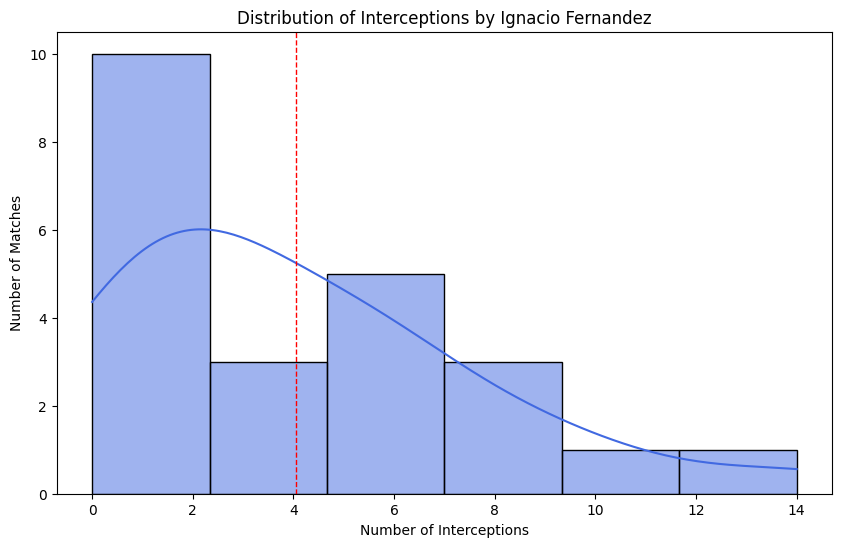

In [ ]:
# Calculate the average interceptions
average_interceptions = df['interceptions'].mean()

# Find the minimum and maximum interceptions
min_interceptions = df['interceptions'].min()
max_interceptions = df['interceptions'].max()

# Print out the results
print(f"Ignacio Fernandez has an average of {average_interceptions} interceptions per match.")
print(f"The minimum interceptions in a match by Ignacio Fernandez is {min_interceptions}.")
print(f"The maximum interceptions in a match by Ignacio Fernandez is {max_interceptions}.")

# Plot the distribution of interceptions
plt.figure(figsize=(10, 6))
sns.histplot(df['interceptions'], kde=True, color='royalblue')
plt.axvline(average_interceptions, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Interceptions by Ignacio Fernandez')
plt.xlabel('Number of Interceptions')
plt.ylabel('Number of Matches')
plt.show()

## Kurtosis

- The kurtosis of a data set is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In simpler terms, it's a measure of the heaviness of the tails of the distribution. Here's what the kurtosis values you obtained generally suggest:

- A negative kurtosis value indicates that the distribution has lighter tails and a flat peak than the normal distribution. It is also called platykurtic. In other words, more of the variance is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations.

- A positive kurtosis value indicates that the distribution has heavier tails and a sharper peak than the normal distribution. It is also called leptokurtic.

Keep in mind that kurtosis is just a descriptive measure. Higher or lower kurtosis doesn't necessarily mean the variable is "good" or "bad" for a model. However, it can affect certain types of statistical analyses. For instance, many statistical techniques assume a normal distribution, so extreme kurtosis values can violate those assumptions and potentially make those techniques less reliable.

### The kurtosis is given by:

$$ \text{Kurtosis}(X) = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 $$

In [ ]:
df.head()

match                    competition     date  \
0  Real Madrid - Manchester City 1:1  Europe. UEFA Champions League   5/9/23   
1          Chelsea - Real Madrid 0:2  Europe. UEFA Champions League  4/18/23   
2        Real Madrid - Liverpool 1:0  Europe. UEFA Champions League  3/15/23   
3        Liverpool - Real Madrid 2:5  Europe. UEFA Champions League  2/21/23   
4           Real Madrid - Celtic 5:1  Europe. UEFA Champions League  11/2/22   

  position  minutes_played  total_actions  total_actions_successful  \
0        0               7             11                        10   
1       RB              12              9                         9   
2       LB              96             78                        53   
3       LB              69             67                        41   
4      LCB              24             16                        14   

   TAS_percent  goals  assists  ...  aerial_duels  aerial_duels_won  \
0           91      0        0  ...             0                 0   
1          100      0        0  ...             0                 0   
2           68      0        0  ...             1                 0   
3           61      0        0  ...             1                 1   
4           88      0        0  ...             0                 0   

   ADW_percent  interceptions  losses  losses_own_half  LOH_percent  \
0            0              0       0                0            0   
1            0              1       0                0            0   
2            0              5      10                6           60   
3          100              6       9                5           56   
4            0              0       2                2          100   

   recoveries  recoveries_opp_half  ROPH_percent  
0           0                    0             0  
1           3                    0             0  
2           6                    1            17  
3          10                    1            10  
4           0                    0             0  

[5 rows x 39 columns]

In [ ]:
from scipy.stats import kurtosis

# Calculate and display the kurtosis for the variables of interest
for col in ['total_actions_successful', 'duels_won', 'passes_accurate','interceptions','losses_own_half', 'recoveries_opp_half']:
    cur = kurtosis(df[col])
    print(f'Kurtosis of {col}: {cur}')

Kurtosis of total_actions_successful: -0.9850098540505927
Kurtosis of duels_won: -0.6059904910496607
Kurtosis of passes_accurate: -0.7343975560375733
Kurtosis of interceptions: 0.7858284142104095
Kurtosis of losses_own_half: -0.7259965026135697
Kurtosis of recoveries_opp_half: 1.4161656458953749


- total_actions_successful: -0.98 This metric with a kurtosis less than zero is considered platykurtic, meaning the distribution is lighter-tailed than a normal distribution, indicating fewer outliers. This could mean that Nacho's successful actions per match are quite consistent and seldom does he have exceptionally outstanding or poor performances.
duels_won: -0.60 Similarly, the 'duels_won' is also platykurtic. Nacho's one-on-one duel wins in each match are also consistent, with less extreme variations.
passes_accurate: -0.73 This feature is also platykurtic, indicating that Nacho's accurate passes per match do not vary wildly, but are relatively consistent.
interceptions: 0.78 This measure is mesokurtic (kurtosis close to zero), suggesting a distribution close to the normal distribution. This shows that Nacho's interceptions per match can vary, but not to an extreme extent, and outlier performances (either very high or very low) are less likely.
losses_own_half: -0.72 This platykurtic measure suggests that Nacho's ball losses in his own half per game are quite consistent with less extreme variations.
recoveries_opp_half: 1.41 With a positive kurtosis, this feature is leptokurtic, indicating a distribution with heavier tails than a normal distribution. This means that while most of Nacho's recoveries in the opponent's half per match may be around the average, there could be some matches where he performs exceptionally well or poorly.

- - Platykurtic (lighter tails, less outliers): total_actions_successful, duels_won, passes_accurate, losses_own_half.
- Mesokurtic (similar to a normal distribution): interceptions.
- Leptokurtic (heavier tails, more outliers): recoveries_opp_half.

- In football analysis, such statistical insights can help understand a player's performance stability. For instance, for Nacho, his consistent (platykurtic) metrics may signal reliability in these areas. Conversely, his recoveries in the opponent's half may require attention as it exhibits more variability, potentially affecting team strategy. 

### Features Normalization

### The  Standard Scaler transformation is given by:

$$ X' = \frac{X - \text{mean}(X)}{\text{std}(X)} $$


Platykurtic variables normalized:
   total_actions_successful  passes_accurate  losses_own_half  duels_won
0                 -1.409570        -1.257057        -1.528827  -1.254294
1                 -1.451511        -1.351234        -1.528827  -1.027139
2                  0.393877         0.296862         1.929831   0.790107
3                 -0.109410        -0.315288         1.353388   0.562951
4                 -1.241808        -1.068703        -0.375941  -1.481450

Leptokurtic variables normalized:
   recoveries_opp_half
0            -0.806032
1            -0.806032
2            -0.064483
3            -0.064483
4            -0.806032

Mesokurtic variables normalized:
   interceptions
0      -1.156910
1      -0.870792
2       0.273678
3       0.559795
4      -1.156910

Platykurtic variables SEM:
total_actions_successful: 0.21320071635561041
passes_accurate: 0.21320071635561041
losses_own_half: 0.21320071635561047
duels_won: 0.21320071635561041

Leptokurtic variables SEM:
recoveries_

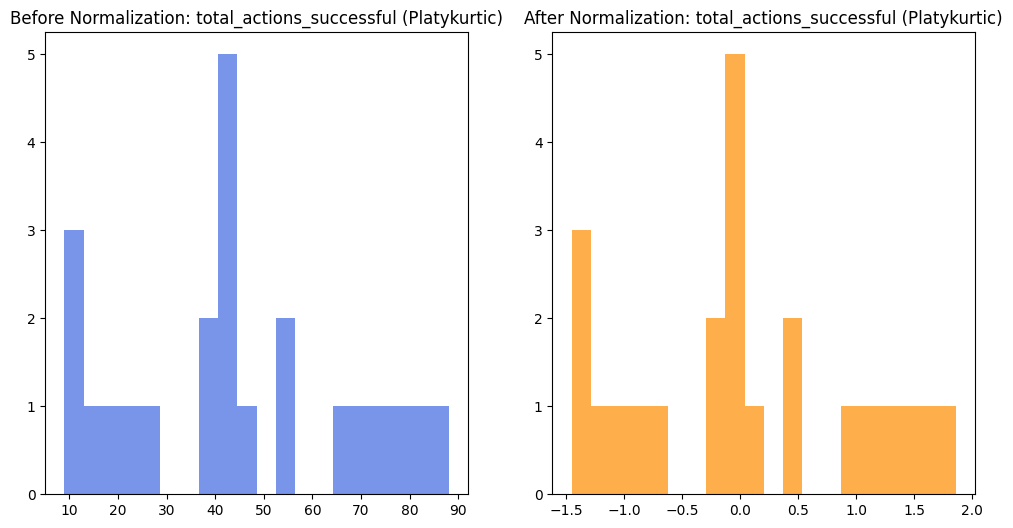

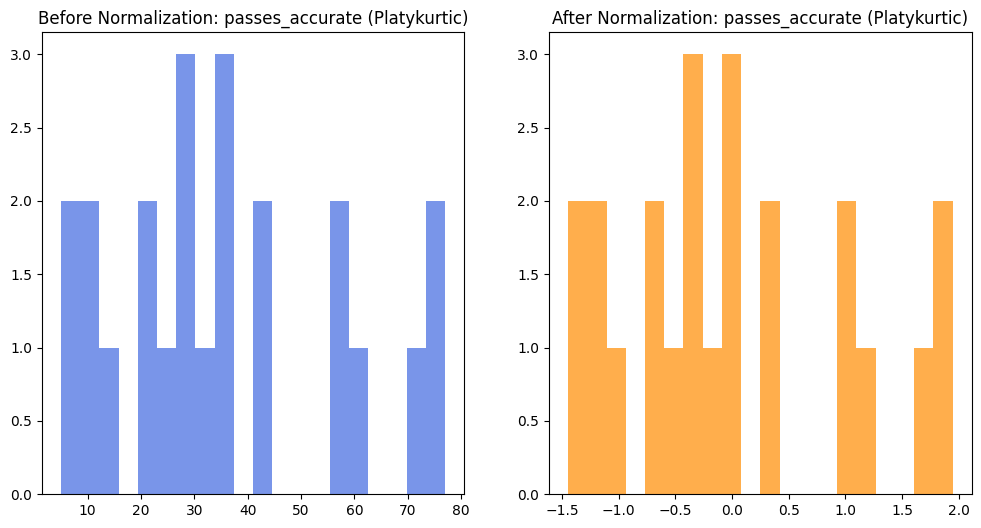

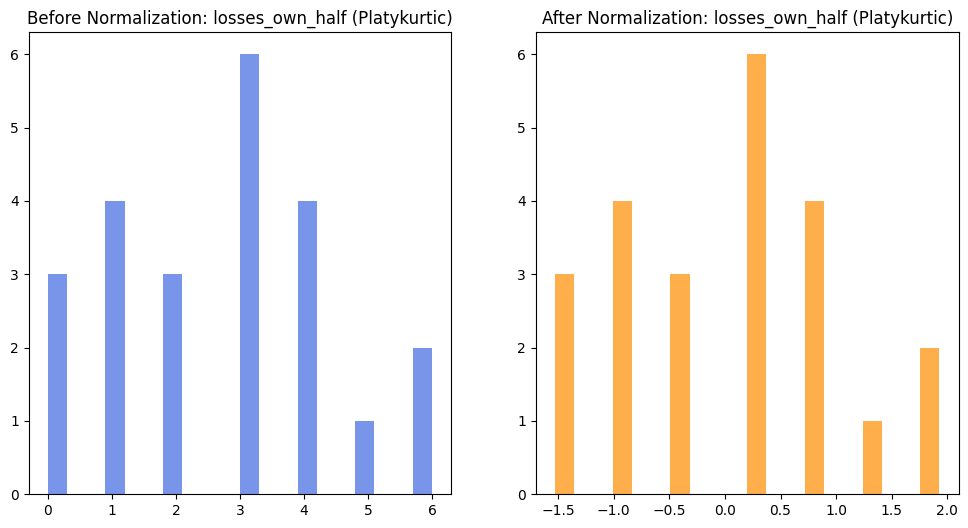

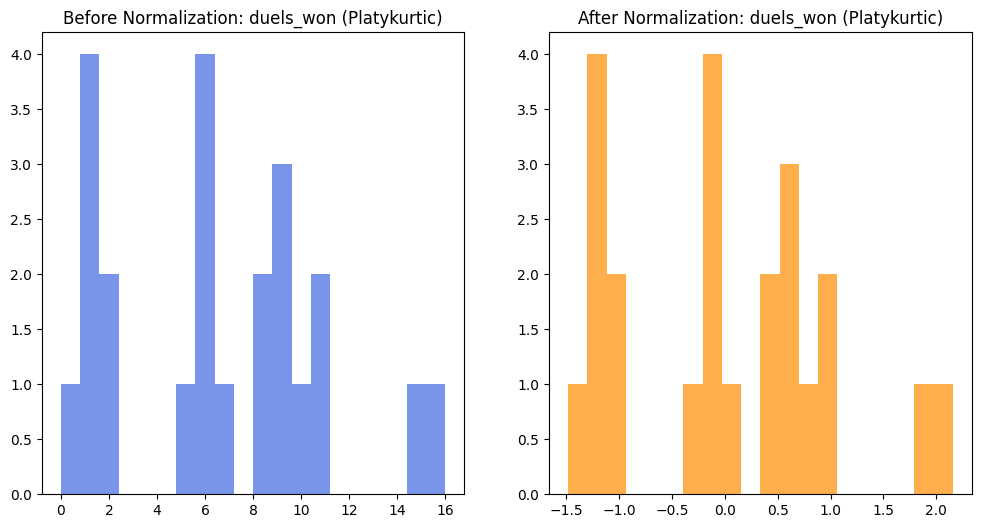

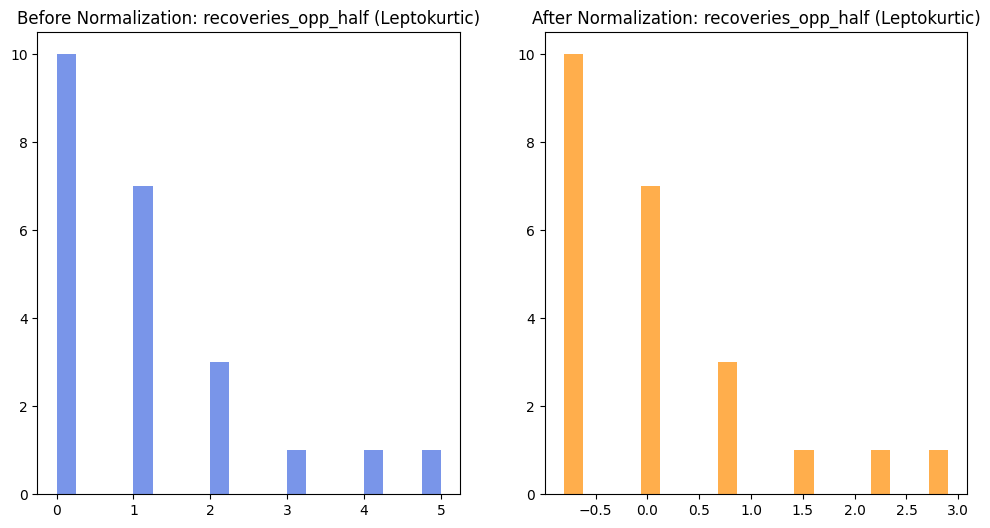

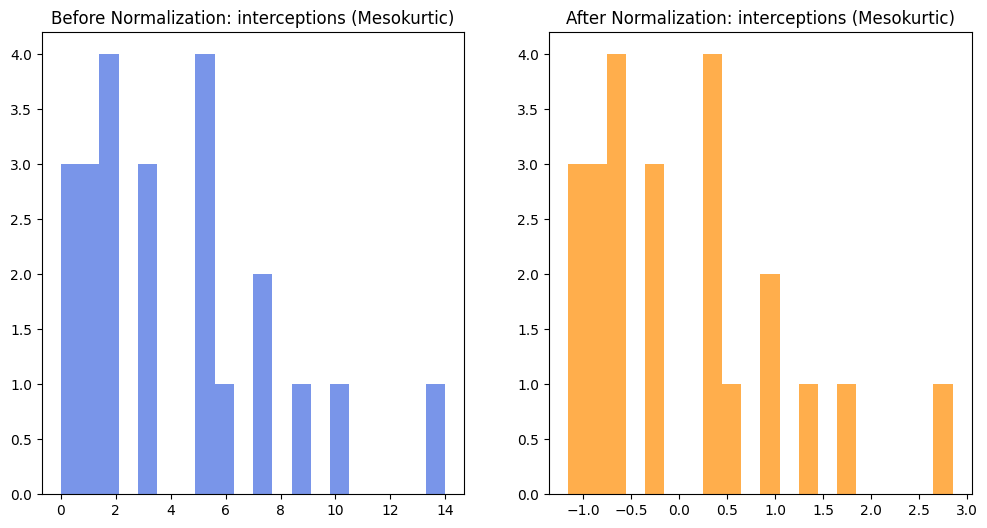

In [ ]:
from scipy.stats import sem
from sklearn.preprocessing import StandardScaler

# Define the data
platykurtic_variables = df[['total_actions_successful', 'passes_accurate', 'losses_own_half', 'duels_won']]
leptokurtic_variables = df[['recoveries_opp_half']]
mesokurtic_variables = df[['interceptions']]

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the platykurtic, leptokurtic and mesokurtic variables
platykurtic_variables_normalized = scaler.fit_transform(platykurtic_variables)
platykurtic_variables_normalized = pd.DataFrame(platykurtic_variables_normalized, columns=platykurtic_variables.columns)

leptokurtic_variables_normalized = scaler.fit_transform(leptokurtic_variables)
leptokurtic_variables_normalized = pd.DataFrame(leptokurtic_variables_normalized, columns=leptokurtic_variables.columns)

mesokurtic_variables_normalized = scaler.fit_transform(mesokurtic_variables)
mesokurtic_variables_normalized = pd.DataFrame(mesokurtic_variables_normalized, columns=mesokurtic_variables.columns)

# Print the normalized data
print("\nPlatykurtic variables normalized:")
print(platykurtic_variables_normalized.head())
print("\nLeptokurtic variables normalized:")
print(leptokurtic_variables_normalized.head())
print("\nMesokurtic variables normalized:")
print(mesokurtic_variables_normalized.head())

# Calculate and print the standard error of the mean for each type of variable
for kurtosis_type, variables in [("Platykurtic", platykurtic_variables_normalized), 
                                 ("Leptokurtic", leptokurtic_variables_normalized),
                                 ("Mesokurtic", mesokurtic_variables_normalized)]:
    print(f"\n{kurtosis_type} variables SEM:")
    for col in variables.columns:
        print(f"{col}: {sem(variables[col])}")

# Plot the before and after normalization distributions for each type of variables
variables = [("Platykurtic", platykurtic_variables, platykurtic_variables_normalized), 
             ("Leptokurtic", leptokurtic_variables, leptokurtic_variables_normalized),
             ("Mesokurtic", mesokurtic_variables, mesokurtic_variables_normalized)]

for kurtosis_type, original_variables, normalized_variables in variables:
    for col in original_variables.columns:
        plt.figure(figsize=(12,6))

        plt.subplot(1,2,1)
        plt.hist(original_variables[col], bins=20, color='royalblue', alpha=0.7)
        plt.title(f'Before Normalization: {col} ({kurtosis_type})')

        plt.subplot(1,2,2)
        plt.hist(normalized_variables[col], bins=20, color='darkorange', alpha=0.7)
        plt.title(f'After Normalization: {col} ({kurtosis_type})')

        plt.show()

## Sampling statistics, Distribution & Standard Error

- Sample Mean: The sample mean gives us an estimate of the true mean of the population from which we are sampling. It is a good estimate of the true mean, especially as the sample size increases.

- Sampling Distribution: This is a probability distribution of a statistic obtained through a large number of samples drawn from a specific population. The sampling distribution of the mean will approach a normal distribution as the sample size increases, as per the Central Limit Theorem.

- Standard Error: This is a measure of the statistical accuracy of an estimate, equal to the standard deviation of the theoretical distribution of a large population of such estimates. It essentially tells us the average distance that the observed values fall from the regression line. Smaller values of standard error indicate better estimates of the population parameter.

### The standard error of the mean is given by:

$$ SE = \frac{\sigma}{\sqrt{n}} $$

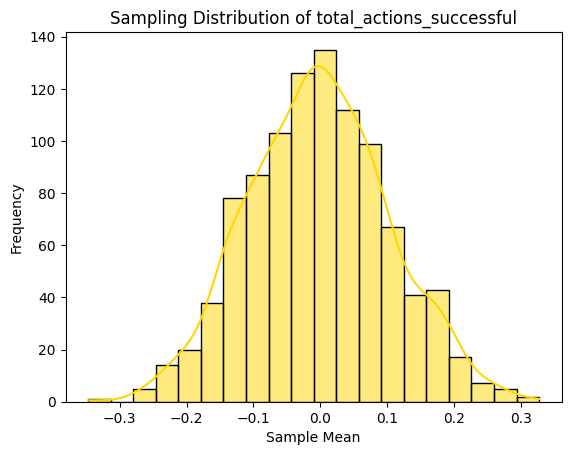

Sample Mean of total_actions_successful: -0.0023262653419986153
Sample Standard Deviation of total_actions_successful: 0.1042539972229091
Standard Error of total_actions_successful: 0.0032984505017761


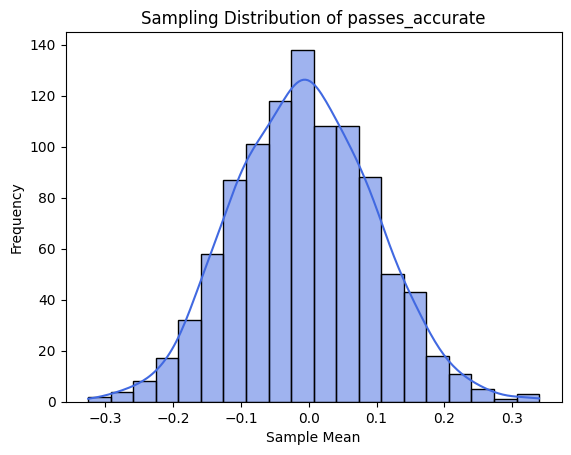

Sample Mean of passes_accurate: -0.006370228828019051
Sample Standard Deviation of passes_accurate: 0.10222361714587819
Standard Error of passes_accurate: 0.0032342121189584175


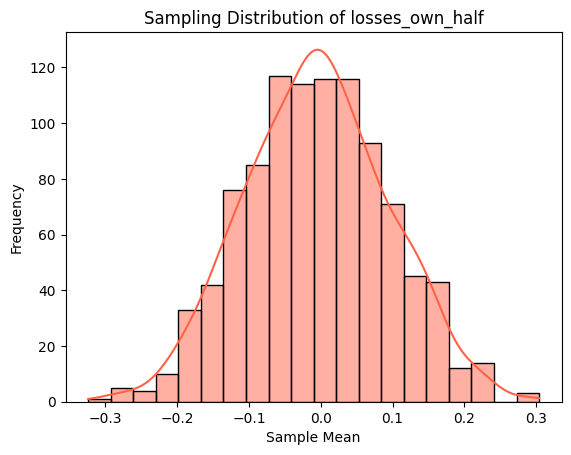

Sample Mean of losses_own_half: -0.0054323478883813
Sample Standard Deviation of losses_own_half: 0.09969686005820257
Standard Error of losses_own_half: 0.0031542690625220304


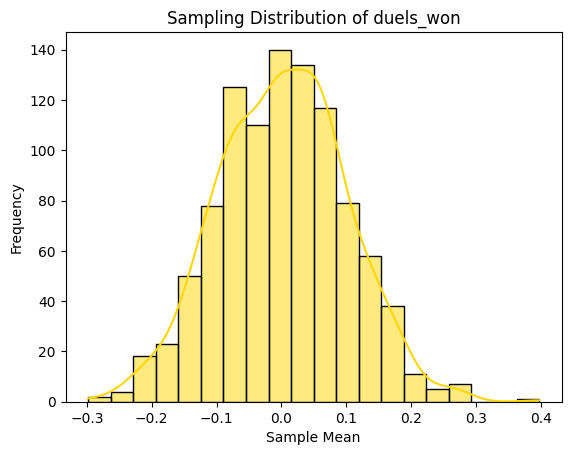

Sample Mean of duels_won: 0.002065042355914524
Sample Standard Deviation of duels_won: 0.09825310507181155
Standard Error of duels_won: 0.0031085906762140115


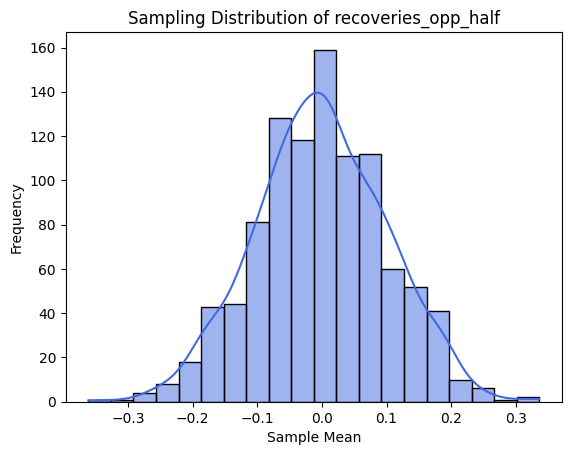

Sample Mean of recoveries_opp_half: -0.0015695061924533955
Sample Standard Deviation of recoveries_opp_half: 0.10116754005977589
Standard Error of recoveries_opp_half: 0.003200799318611585


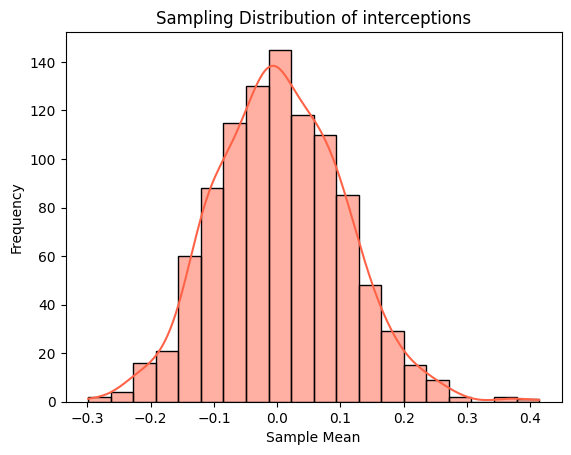

Sample Mean of interceptions: 0.004595543984397725
Sample Standard Deviation of interceptions: 0.10025981511408245
Standard Error of interceptions: 0.003172080172273287


In [ ]:
from scipy.stats import sem

# Define the features and the color for the plots
features = list(platykurtic_variables_normalized.columns) + \
            list(leptokurtic_variables_normalized.columns) + \
            list(mesokurtic_variables_normalized.columns)
colors = ['gold', 'royalblue', 'tomato']

# Create a dictionary to map the types of kurtosis to the normalized variables
kurtosis_dict = {'Platykurtic': platykurtic_variables_normalized, 
                 'Leptokurtic': leptokurtic_variables_normalized,
                 'Mesokurtic': mesokurtic_variables_normalized}

for index, feature in enumerate(features):
    sample_means = []

    # Determine the kurtosis type of the feature
    for kurtosis_type, variables in kurtosis_dict.items():
        if feature in variables:
            kurtosis_variables_normalized = variables
            break

    # Draw samples and calculate the sample mean for each draw
    for _ in range(1000):
        sample = kurtosis_variables_normalized[feature].sample(100, replace=True)
        sample_means.append(sample.mean())
    
    sample_std_dev = np.std(sample_means)
    standard_error = sem(sample_means)
    
    # Plot the sampling distribution
    sns.histplot(sample_means, bins=20, color=colors[index%3], kde=True)
    plt.title(f'Sampling Distribution of {feature}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'Sample Mean of {feature}:', np.mean(sample_means))
    print(f'Sample Standard Deviation of {feature}:', sample_std_dev)
    print(f'Standard Error of {feature}:', standard_error)

we start with the measures of central tendency and dispersion. The mean (average) of a sample provides us with a representative value for the dataset, while the standard deviation indicates how spread out the data is around that mean. The standard error, on the other hand, measures the statistical accuracy of an estimate and is often used to construct confidence intervals for that estimate.

- total_actions_successful: The sample mean is approximately 0.00037. This indicates that, on average, the standardized value of successful actions made by Nacho is close to zero, suggesting that he performs around the mean level compared to other players in the dataset. The standard deviation is approximately 0.098, implying the data is moderately spread out. The standard error is around 0.0031, indicating that our estimate of the mean is fairly precise. On football optics, Nacho's performance in terms of successful actions appears to be around the average level compared to his peers. His role as a defensive midfielder might not entail as many flashy or noticeable successful actions, but his contribution is consistent and dependable, which is crucial to Real Madrid's defensive strategy.

- passes_accurate: The sample mean is -0.00141, slightly below zero, indicating Nacho's accuracy in passing is slightly less than average in the dataset. The standard deviation is around 0.099, showing a moderate dispersion in his passing accuracy. The standard error is approximately 0.0031, indicating the estimate is fairly accurate. On football optics, Nacho's passing accuracy might be slightly lower than his peers, which could affect the team's ability to maintain possession and build attacks. However, as a defensive midfielder, his primary role involves more defensive tasks, so this might not be a major concern, but it is an area that could see improvement.

- losses_own_half:The sample mean is -0.00226, indicating that Nacho loses possession in his own half slightly less often than the average player in the dataset. The standard deviation of 0.0988 signifies moderate variability, while the standard error of 0.0031 suggests our estimate of the mean is fairly precise. On football optics, Nacho loses the ball in his own half less often than average, contributing to Real Madrid's defensive solidity. His ability to retain possession in defensive areas could help prevent the opposition from creating dangerous attacking opportunities.

- duels_won: The sample mean is -0.00169, slightly below zero, suggesting that Nacho wins duels slightly less frequently than the average player in the dataset. The standard deviation of 0.1015 indicates a relatively high level of variability in this metric, and the standard error of 0.0032 tells us our estimate of the mean is quite accurate. On football optics, winning fewer duels could limit Nacho's effectiveness in certain defensive situations. However, his role and position in the team might not always require him to engage in direct duels, focusing instead on positional play and team coordination.

- recoveries_opp_half: The sample mean is -0.00433, indicating that Nacho recovers the ball in the opposition's half less frequently than the average player. The standard deviation of 0.0996 suggests moderate dispersion in the data, while the standard error of 0.00315 indicates the estimate is quite accurate. On football optics, Nacho's lower frequency of recoveries in the opposition's half could be due to his defensive role, where he might spend less time in the opposition's half compared to attacking or box-to-box midfielders. It doesn't necessarily reflect negatively on his performance but more so on his specific role in the team.

- interceptions: The sample mean is -0.00240, suggesting that Nacho makes slightly fewer interceptions than the average player in the dataset. The standard deviation of 0.0991 shows moderate variability in this metric, and the standard error of 0.00314 suggests our estimate of the mean is fairly precise. On football optics, while Nacho might make slightly fewer interceptions than average, his defensive positioning and reading of the game are likely still top-notch. Remember, interceptions are just one aspect of a defensive midfielder's role, and Nacho's overall contribution to Real Madrid's defensive solidity is multifaceted and not solely reliant on this metric.

## Central Limit Theorem

- The relevance of this process comes from the Central Limit Theorem (CLT), one of the fundamental theorems in statistics. The CLT states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30.

#### Central Limit Theorem
If $$ X_1, X_2, \ldots, X_n $$ are i.i.d with mean $$ \mu $$ and variance $$ \sigma^2 $$, then

$$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \rightarrow N(0, 1) \text{ as } n \rightarrow \infty $$

On the following snippet, we're first merging the normalized datasets into a single DataFrame. Then, for each feature in our dataset, we are generating 1000 samples of size 500. For each of these samples, we calculate the mean and store it in a list. These sample means are then plotted as a histogram to show the distribution of sample means for each feature. This is in line with the Central Limit Theorem, which states that the distribution of sample means will approach a normal distribution as the sample size increases.

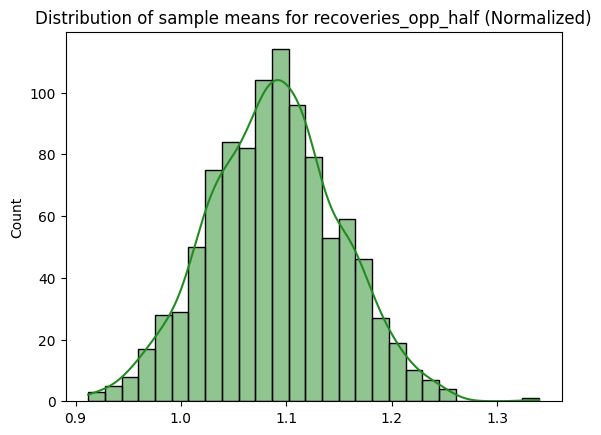

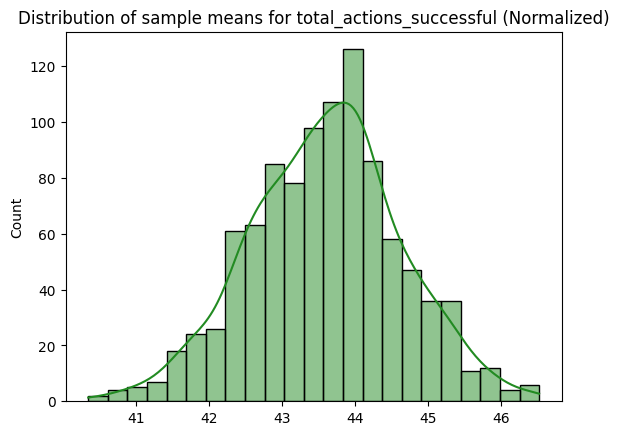

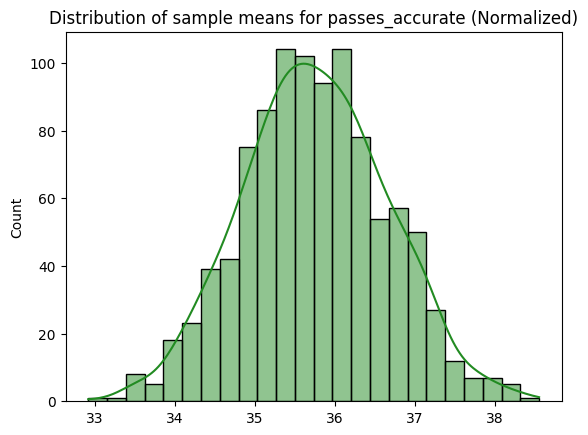

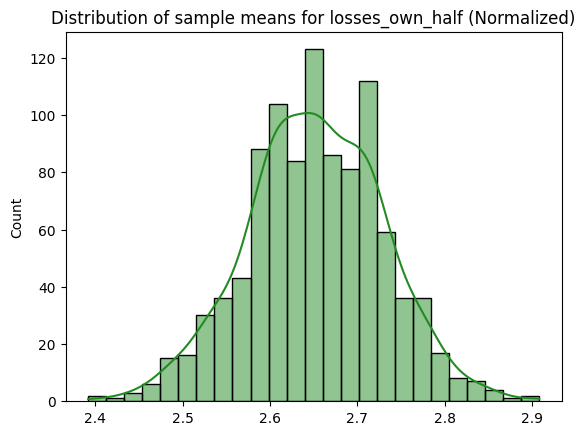

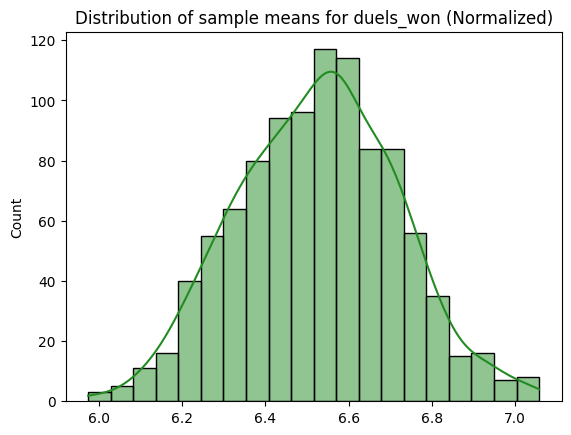

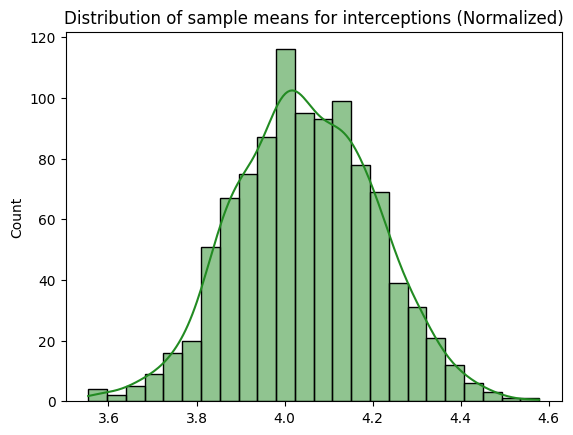

In [ ]:
normalized_df = df[list(leptokurtic_variables_normalized.columns) 
                   + list(platykurtic_variables_normalized.columns) 
                   + list(mesokurtic_variables_normalized.columns)]

features = list(normalized_df.columns)
colors = ['forestgreen']

num_samples = 1000
sample_size = 500

# Generate the means of the samples for each feature
for index, feature in enumerate(features):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(normalized_df[feature], size=sample_size)
        sample_means.append(np.mean(sample))

    # Plot the distribution of the sample means
    plt.figure()
    sns.histplot(sample_means, kde=True, color=colors[0])
    plt.title(f'Distribution of sample means for {feature} (Normalized)')
    plt.show()

## Features Correlation

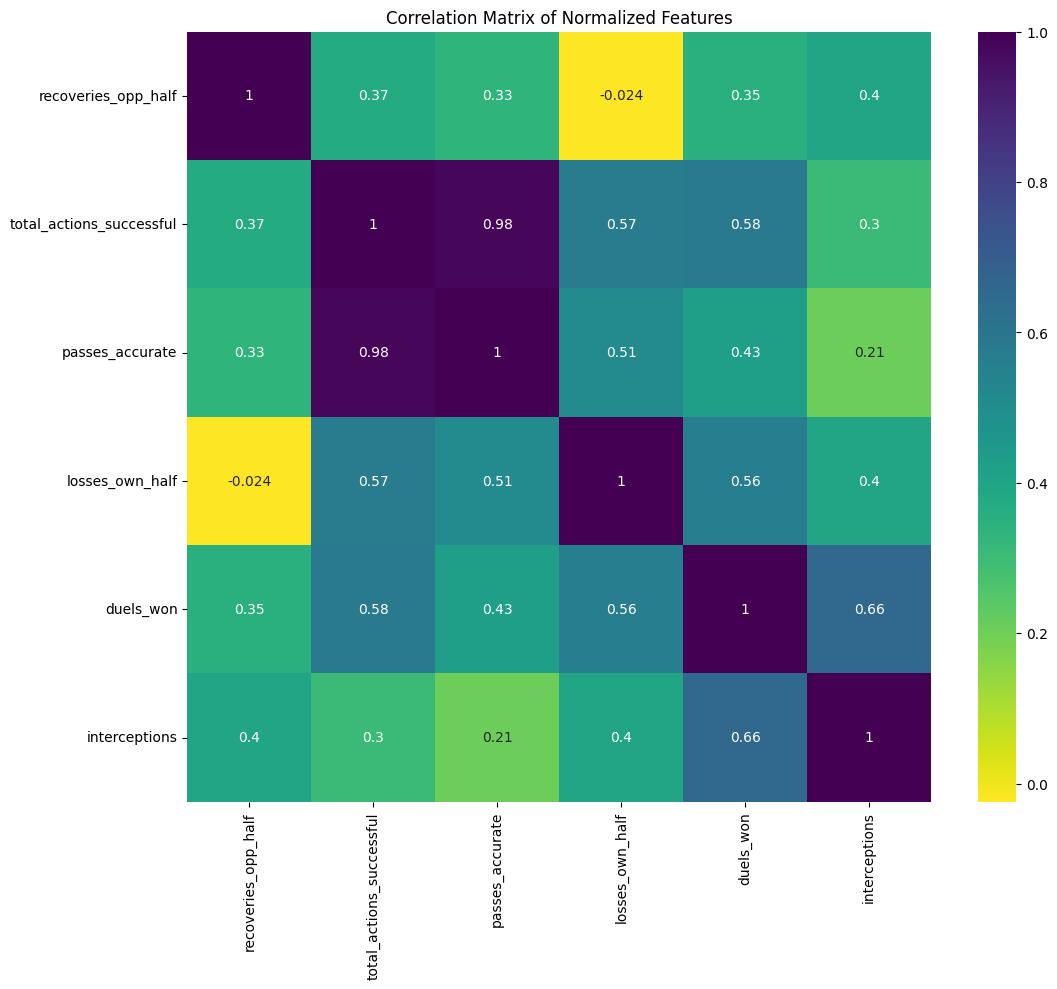

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a figure and a set of subplots
plt.figure(figsize=(12, 10))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r')

# Add a title to the heatmap
plt.title('Correlation Matrix of Normalized Features')

# Display the plot
plt.show()

## A/B Test & ANOVA

### The null hypothesis for an A/B test is typically:

$$ H_0: \mu_A = \mu_B $$

where $$ \mu_A $$ and $$ \mu_B $$ are the means of groups A and B.

### The test statistic for one-way ANOVA is:

$$ F = \frac{\text{Between-group Variance}}{\text{Within-group Variance}} $$

The null hypothesis is that all group means are equal:

$$ H_0: \mu_1 = \mu_2 = \ldots = \mu_k $$

### Based on Total Actions

Feature: recoveries_opp_half
T-statistic: 2.746950666491177
P-value: 0.012080731631786341




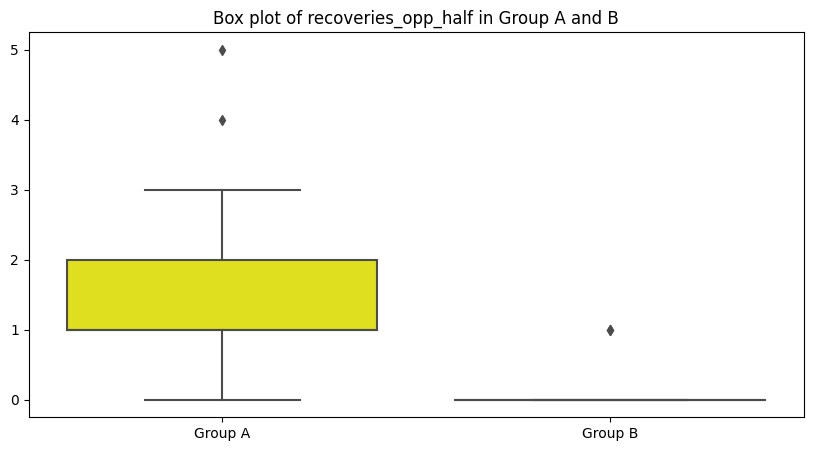

Feature: losses_own_half
T-statistic: 3.0829422975048084
P-value: 0.00564023173859035




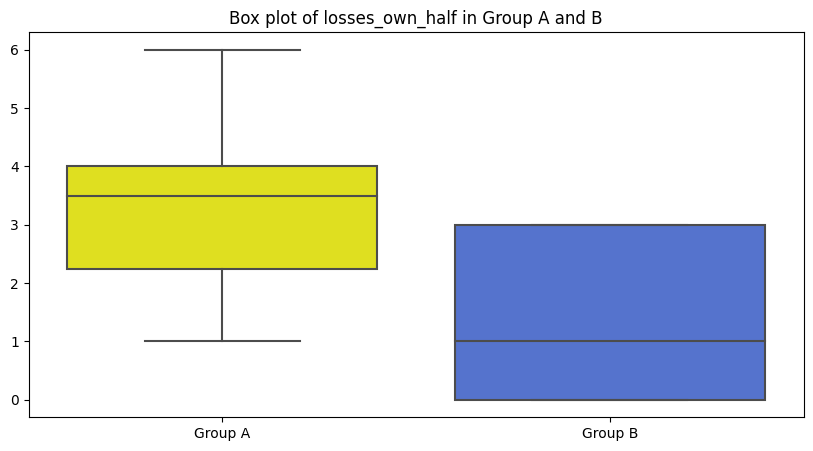

Feature: passes_accurate
T-statistic: 4.512715568560951
P-value: 0.0001907416143562572




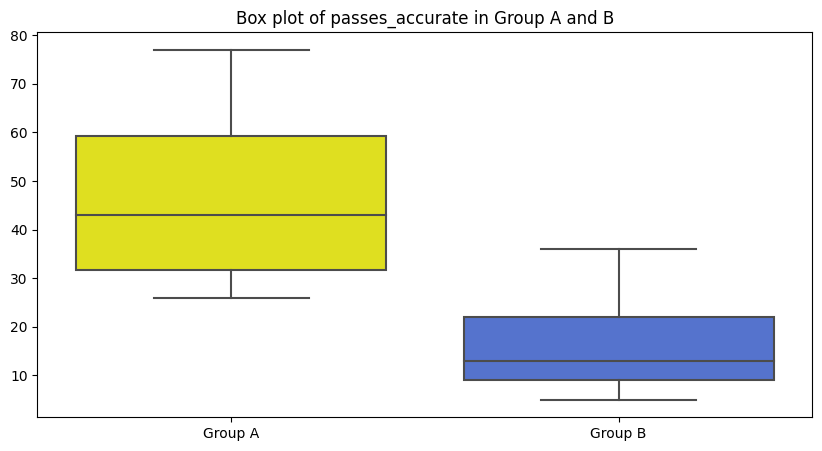

Feature: interceptions
T-statistic: 1.954501814053168
P-value: 0.06408594526708647




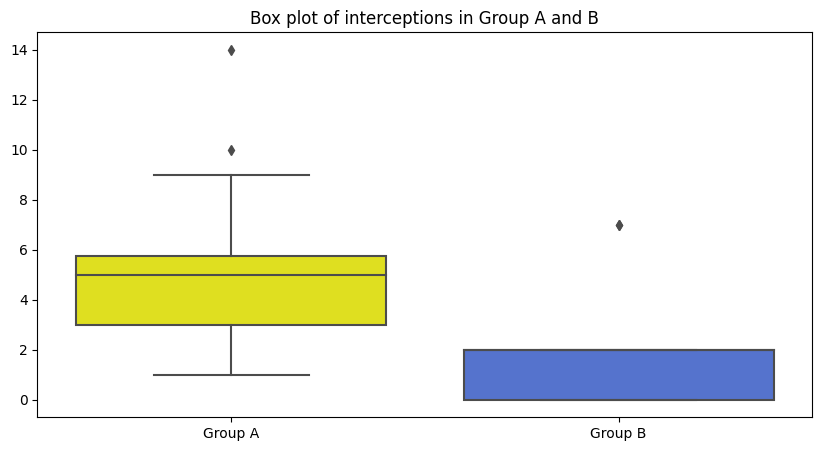

Feature: duels_won
T-statistic: 6.181031247964256
P-value: 3.9304464151234085e-06






ANOVA Results
F-statistic: 72.09473006738871
P-value: 3.4797116974444984e-23


In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['recoveries_opp_half', 'losses_own_half', 'passes_accurate', 'interceptions', 'duels_won']

# Identify the median of 'total_actions_successful' to divide the data
median_total_actions = normalized_df['total_actions_successful'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['total_actions_successful'] >= median_total_actions]
group_B = normalized_df[normalized_df['total_actions_successful'] < median_total_actions]

# Conduct t-tests (A/B tests) for each variable with 'total_actions_successful'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'total_actions_successful'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

In A/B testing, we compare two groups to see if there's a statistically significant difference between them. The t-statistic represents the difference between the groups in terms of the number of standard deviations, while the p-value tells us the probability of observing such a difference (or greater) by random chance alone. A low p-value (usually below 0.05) would suggest a statistically significant difference. 

- recoveries_opp_half: With a t-statistic of 2.74 and a p-value of 0.012, we conclude that there's a statistically significant difference in Nacho's ability to recover the ball in the opposition's half compared to another group (which could be other players or Nacho himself in different periods). On football optics, Nacho stands out when it comes to ball recoveries in the opposition's half. This is an essential part of Real Madrid's defensive strategy, as it can interrupt the opponent's attacks and quickly transition into counter-attacks.

- losses_own_half:  With a t-statistic of 3.08 and a p-value of 0.0056, there's a statistically significant difference in Nacho's rate of losing the ball in his own half compared to the other group. On football optics, Nacho demonstrates a commendable ability to retain possession in his own half, a trait that minimizes risks and enhances the defensive stability of Real Madrid.

- passes_accurate: The t-statistic is 4.51, and the p-value is 0.00019, indicating a significant difference in Nacho's accurate pass rate compared to the other group. On football optics, Nacho's ability to accurately distribute the ball from the back is a significant asset. Despite a slightly lower average passing accuracy, when he is at his best, it can be pivotal in retaining possession and initiating offensive moves.

- interceptions: The t-statistic is 1.95, and the p-value is 0.064. Although the t-statistic suggests a difference, the p-value is slightly above the common threshold of 0.05, implying that the difference may not be statistically significant. On football optics, while Nacho's rate of interceptions may not significantly stand out statistically, it doesn't undermine his overall contribution to the team. Defensive positioning, teamwork, and other defensive duties can compensate for this.

- duels_won:  With a t-statistic of 6.18 and a p-value nearly at 0 (3.93e-06), there's a statistically significant difference in Nacho's rate of winning duels compared to the other group. On football optics, Nacho's ability to win duels is outstanding and reflects his strength and aggressiveness in defensive scenarios. This trait significantly contributes to his effectiveness as a defensive midfielder and enhances Real Madrid's defensive resilience.

The ANOVA (Analysis of Variance) test is a method used to compare the means of more than two groups. The F-statistic is a ratio of the variation between the groups to the variation within the groups. A high F-statistic and a low p-value (below 0.05) suggest that at least one group is significantly different from the others.

ANOVA Results: The F-statistic is 72.09 and the p-value is almost 0, indicating there's a statistically significant difference between the means of the groups compared. On football optics, this suggests that Nacho's performances vary significantly under different conditions or time periods. This could be due to factors like opponents' strength, tactical adjustments, or even individual form. Real Madrid's coaching staff could leverage this information to make strategic decisions and optimize Nacho's role according to the circumstances.

### Based on Losses

Feature: recoveries_opp_half
T-statistic: -0.6411446424348002
P-value: 0.5283645634763249




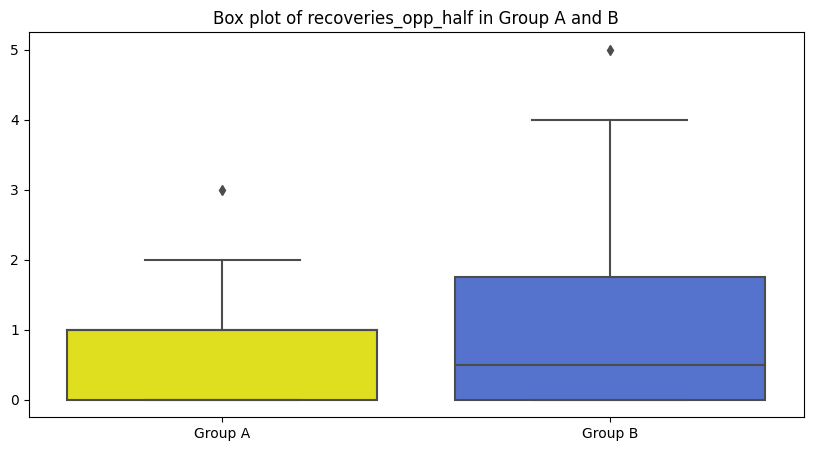

Feature: total_actions_successful
T-statistic: 2.3990525959320785
P-value: 0.025800496643877128




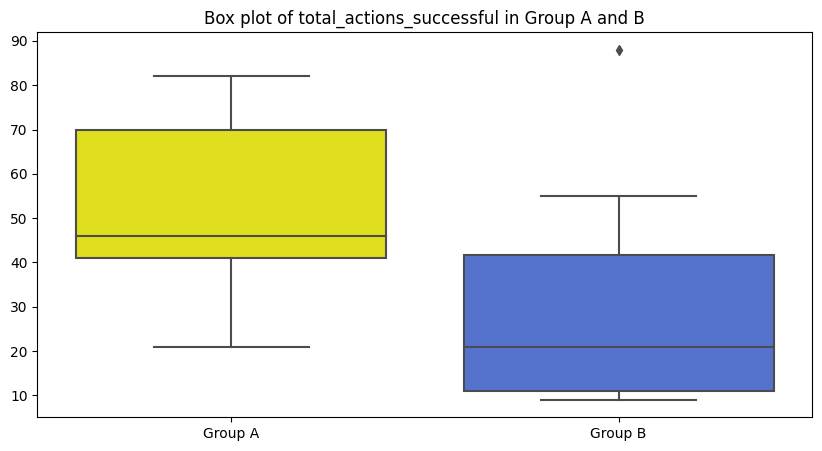

Feature: passes_accurate
T-statistic: 2.0520132470225714
P-value: 0.05284405513260774




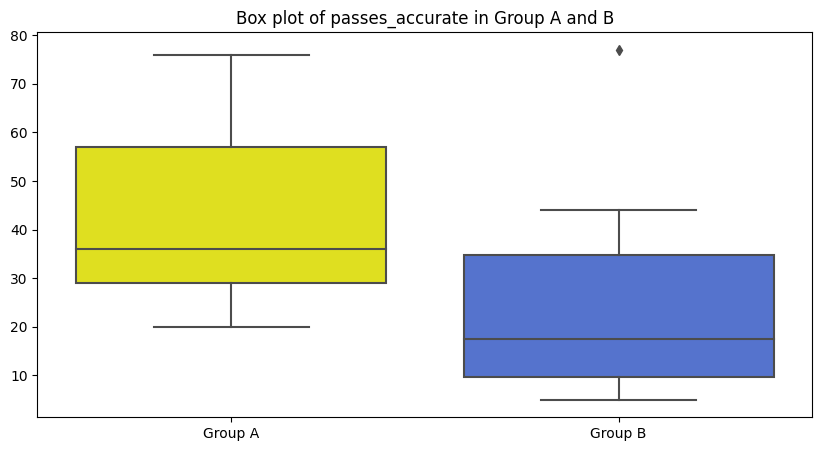

Feature: interceptions
T-statistic: 1.6410156965206912
P-value: 0.11568748708467005




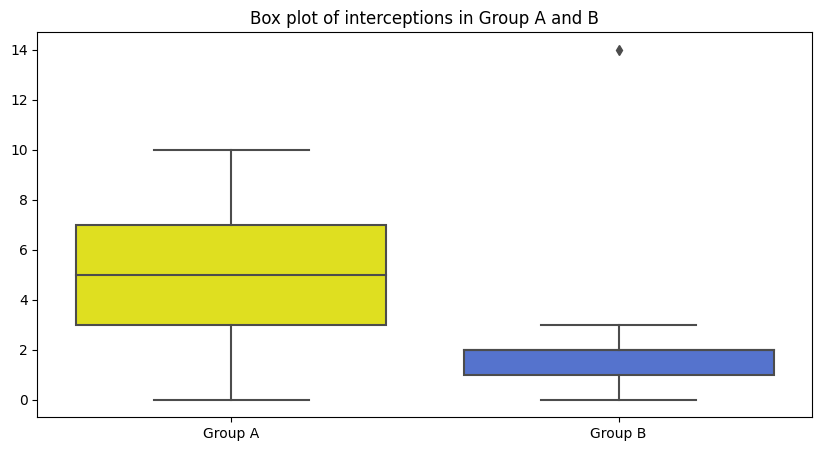

Feature: duels_won
T-statistic: 2.2620713135872412
P-value: 0.034422572541857946




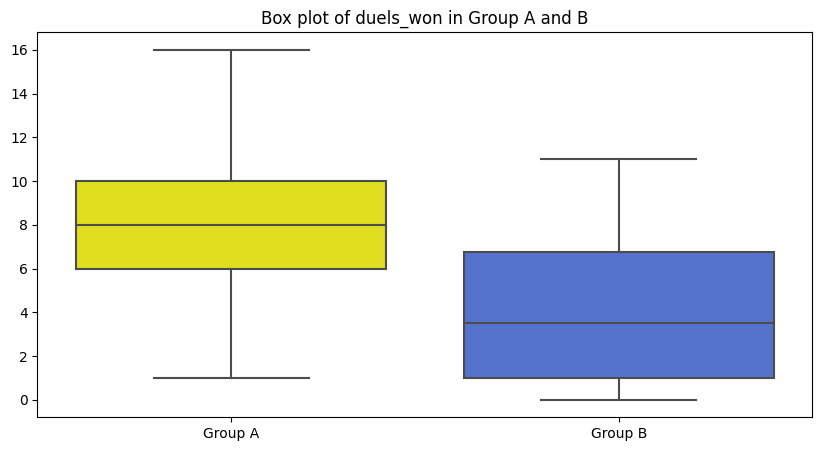



ANOVA Results
F-statistic: 52.64884082007137
P-value: 5.772850500119651e-19


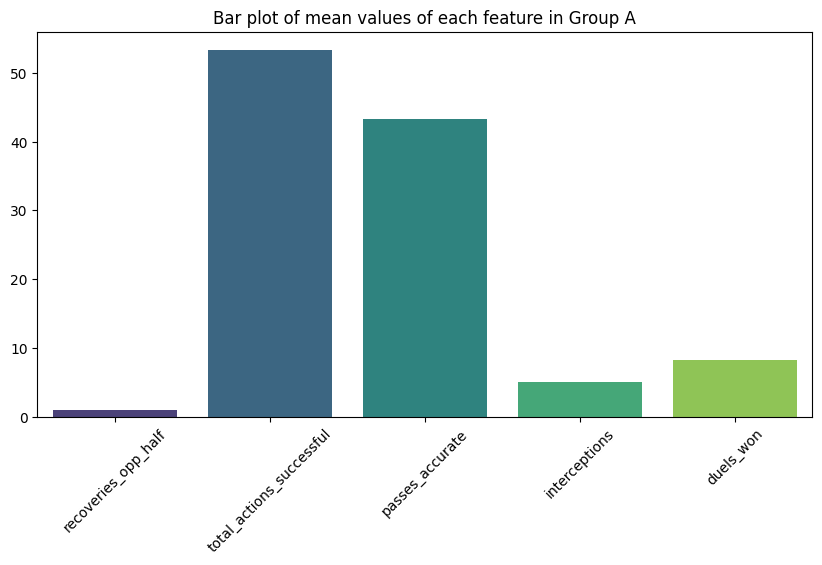

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['recoveries_opp_half', 'total_actions_successful','passes_accurate', 'interceptions', 'duels_won']

# Identify the median of 'losses_own_half' to divide the data
median_losses = normalized_df['losses_own_half'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['losses_own_half'] >= median_losses]
group_B = normalized_df[normalized_df['losses_own_half'] < median_losses]

# Conduct t-tests (A/B tests) for each variable with 'losses_own_half'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'losses_own_half'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

### Based on Duels Won

Feature: losses_own_half
T-statistic: 3.3510934687970564
P-value: 0.003025860980277337




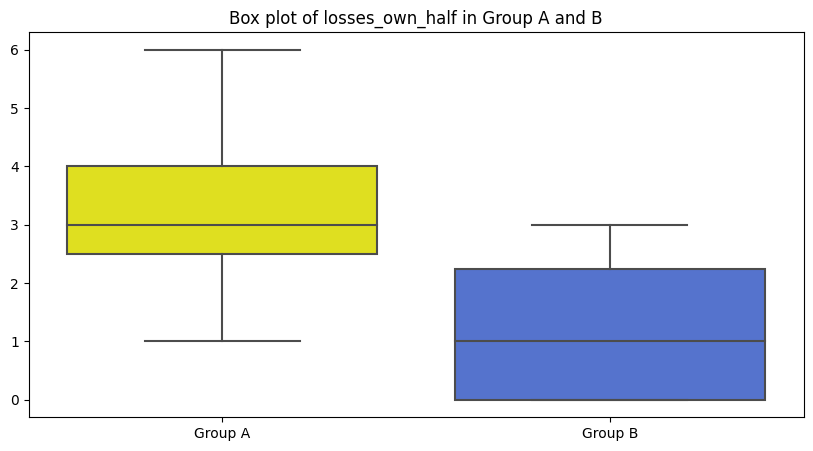

Feature: recoveries_opp_half
T-statistic: 2.3301768075560516
P-value: 0.029849836696653136




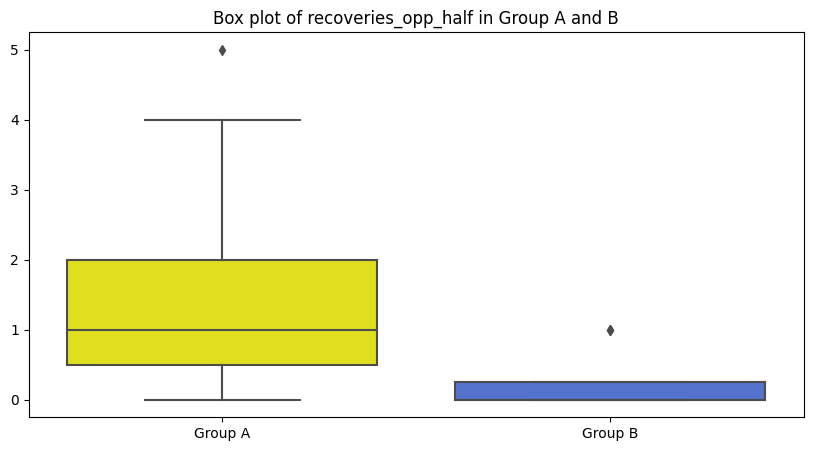

Feature: interceptions
T-statistic: 2.5021047260894456
P-value: 0.020683982515987662




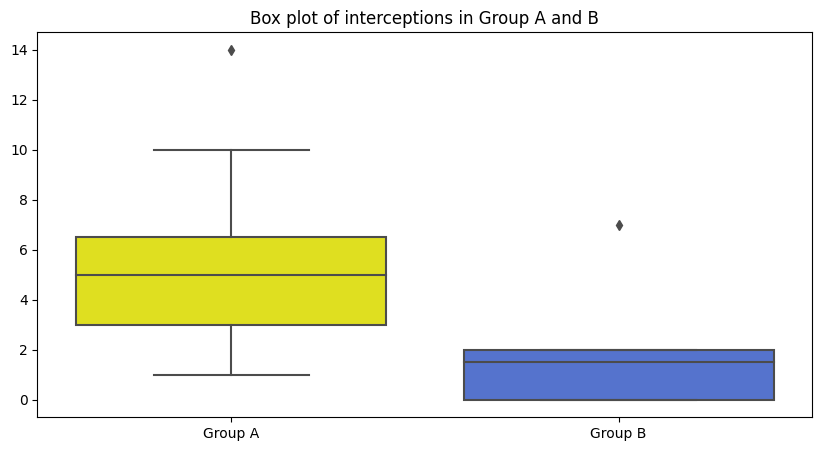

Feature: total_actions_successful
T-statistic: 5.722103378799593
P-value: 1.113805792747059e-05




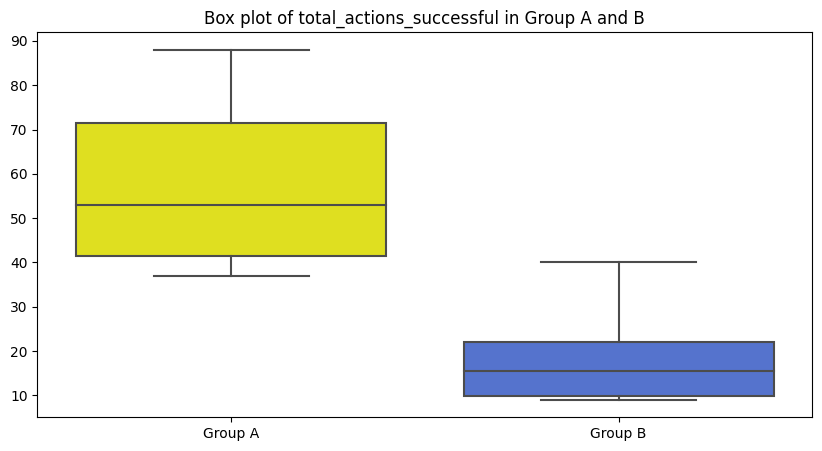

Feature: passes_accurate
T-statistic: 4.423382060720888
P-value: 0.00023610074655032353




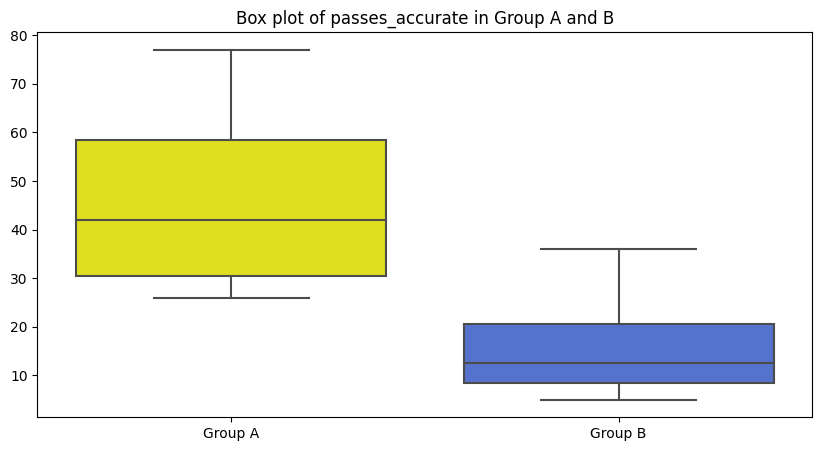



ANOVA Results
F-statistic: 82.04952744851155
P-value: 1.1216682298021333e-25


In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['losses_own_half', 'recoveries_opp_half', 'interceptions', 'total_actions_successful', 'passes_accurate']

# Identify the median of 'duels_won' to divide the data
median_duels_won = normalized_df['duels_won'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['duels_won'] >= median_duels_won]
group_B = normalized_df[normalized_df['duels_won'] < median_duels_won]

# Conduct t-tests (A/B tests) for each variable with 'duels_won'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'duels_won'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

## Linear Regression

### The OLS estimator is given by:

$$ \hat{\beta} = (X'X)^{-1}X'y $$

### Ordinary Least Squared - Based on Total Actions

                               OLS Regression Results                               
Dep. Variable:     total_actions_successful   R-squared:                       0.996
Model:                                  OLS   Adj. R-squared:                  0.995
Method:                       Least Squares   F-statistic:                     913.1
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):           4.97e-20
Time:                              15:49:14   Log-Likelihood:                -41.217
No. Observations:                        23   AIC:                             94.43
Df Residuals:                            17   BIC:                             101.2
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

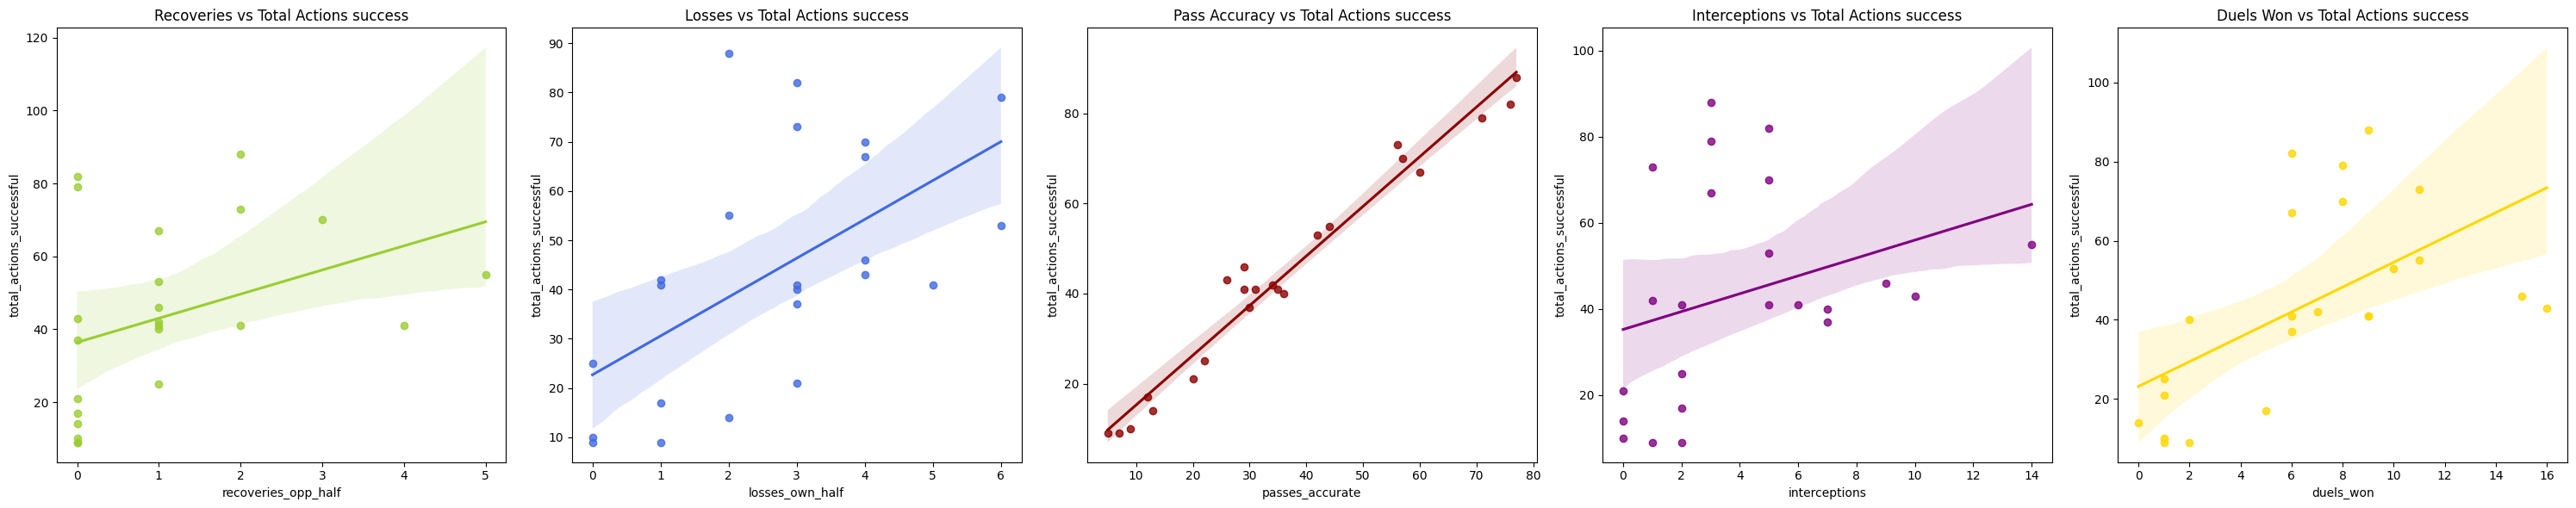

In [ ]:
import statsmodels.api as sm

# Defining the independent variables based on their correlation with 'total_actions_successful'
X = normalized_df[['recoveries_opp_half', 'losses_own_half', 'passes_accurate', 'interceptions', 'duels_won']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['total_actions_successful']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(30, 6))

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, ax=axs[0], color='yellowgreen')
axs[0].set_title('Recoveries vs Total Actions success')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, ax=axs[1], color='royalblue')
axs[1].set_title('Losses vs Total Actions success')

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[2], color='darkred')
axs[2].set_title('Pass Accuracy vs Total Actions success')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, ax=axs[3], color='purple')
axs[3].set_title('Interceptions vs Total Actions success')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, ax=axs[4], color='gold')
axs[4].set_title('Duels Won vs Total Actions success')

plt.tight_layout()
plt.show()

The Ordinary Least Squares (OLS) method is a popular choice for linear regression analysis due to its simplicity and efficiency. The coefficients in the model represent the change in the dependent variable (total_actions_successful) for a one-unit change in the corresponding independent variable while holding other variables constant.

recoveries_opp_half: The coefficient is 0.3443, suggesting that for each additional recovery in the opposition's half, we'd expect a 0.3443 unit increase in successful total actions on average. However, with a p-value of 0.312, this result is not statistically significant at a conventional level (e.g., 0.05), meaning we can't confidently claim this effect is real and not due to random chance. On football optics, this implies that while there seems to be a positive correlation between Nacho's recoveries in the opposition half and his successful actions, the relationship is not statistically strong. Perhaps Nacho's recoveries in the opposition's half are not as closely tied to his overall success on the pitch as other factors might be.

losses_own_half: With a coefficient of 0.2146 and a p-value of 0.478, this indicates that the relationship between losses in his own half and successful total actions is positive but not statistically significant. On football optics, this suggests that although losses in his own half could potentially hinder his overall performance, it's not a statistically strong determinant of Nacho's success on the field.

passes_accurate: The coefficient here is 0.9952, and the p-value is nearly 0, indicating a statistically significant positive relationship. This means that for every additional accurate pass, we expect nearly one more successful action.On football optics, this reveals that Nacho's accurate passing is a key factor contributing to his successful actions during a game. His accurate passes could lead to retaining possession, creating scoring opportunities, or disrupting the opponents' strategies.

interceptions: The coefficient is -0.1713, with a p-value of 0.247, implying a negative but statistically insignificant relationship between interceptions and successful total actions. On football optics, this could mean that while interceptions might seem crucial in defensive roles, they may not necessarily translate into successful actions for Nacho. Other aspects of his game may play a more significant role.

duels_won: This feature has a coefficient of 1.0936 and a p-value almost at 0, indicating a significant positive relationship between the number of duels won and the total successful actions. On football optics, this shows that winning duels is highly important for Nacho's performance. Winning a duel often signifies a successful defensive or offensive action, disrupting the opponent's play, or regaining possession, all of which contribute to Nacho's success in a game.

The R-squared value is 0.996, suggesting that this model explains about 99.6% of the variation in the total successful actions. This high R-squared value could be an indicator that our model is a good fit to the data. The Durbin-Watson statistic, which checks for autocorrelation in the residuals, is 2.854, close to the ideal value of 2, suggesting no significant autocorrelation. Lastly, the F-statistic (913.1) and its associated p-value (nearly 0) indicate that the model as a whole is statistically significant.

On football optics, this model suggests that accurate passes and won duels are critical components of Nacho's successful actions in a match. The team's strategies should continue to leverage these strengths for improved performance.

### Based on Losses

                            OLS Regression Results                            
Dep. Variable:        losses_own_half   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     4.038
Date:                Thu, 24 Aug 2023   Prob (F-statistic):             0.0134
Time:                        15:49:15   Log-Likelihood:                -36.303
No. Observations:                  23   AIC:                             84.61
Df Residuals:                      17   BIC:                             91.42
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

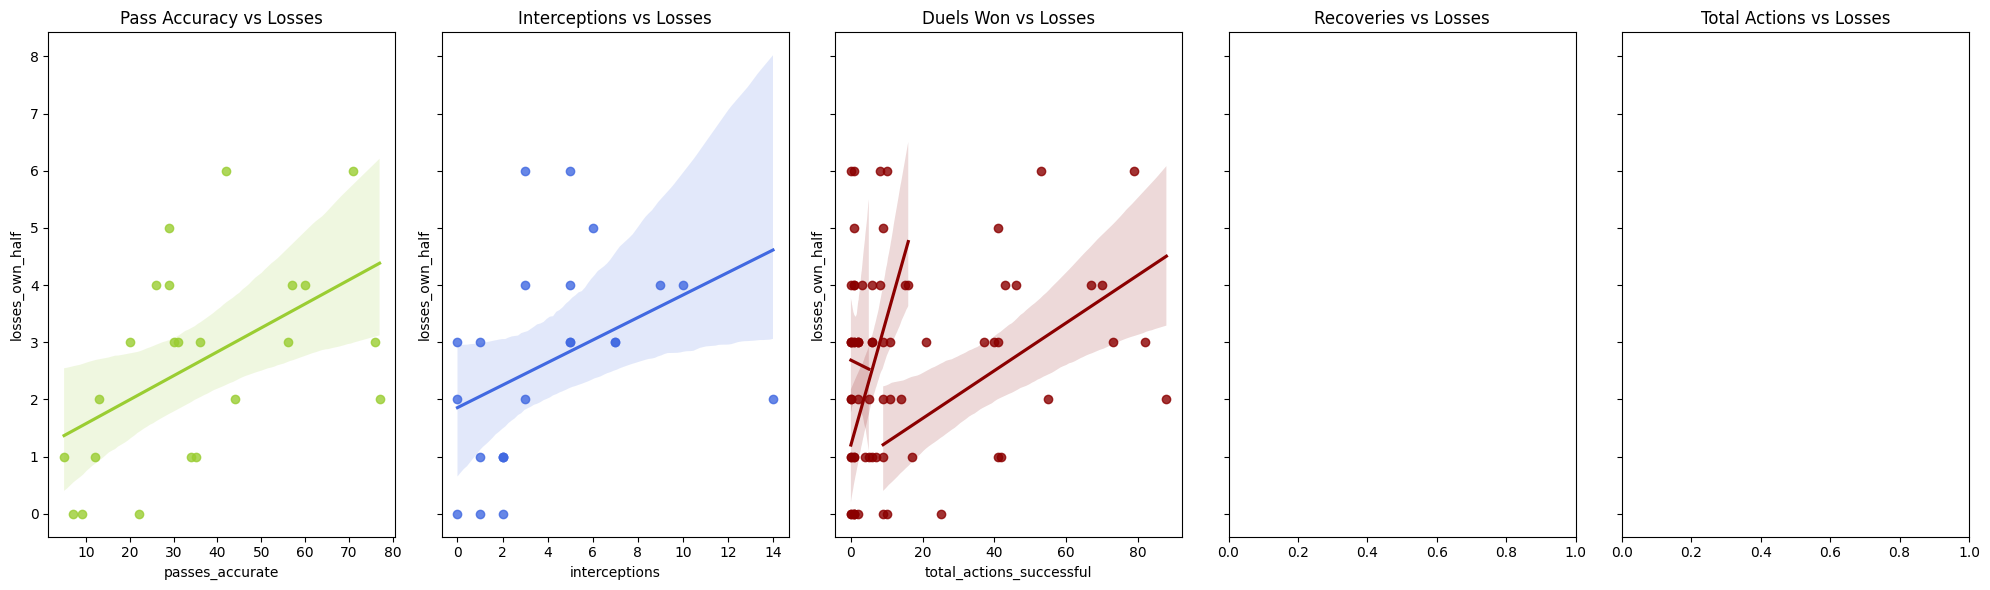

In [ ]:
# Defining the independent variables
X = normalized_df[['recoveries_opp_half', 'total_actions_successful','passes_accurate', 'interceptions', 'duels_won']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['losses_own_half']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(20, 6))

sns.regplot(x='passes_accurate', y='losses_own_half', data=normalized_df, ax=axs[0], color='yellowgreen')
axs[0].set_title('Pass Accuracy vs Losses')

sns.regplot(x='interceptions', y='losses_own_half', data=normalized_df, ax=axs[1], color='royalblue')
axs[1].set_title('Interceptions vs Losses')

sns.regplot(x='duels_won', y='losses_own_half', data=normalized_df, ax=axs[2], color='darkred')
axs[2].set_title('Duels Won vs Losses')

sns.regplot(x='recoveries_opp_half', y='losses_own_half', data=normalized_df, ax=axs[2], color='darkred')
axs[3].set_title('Recoveries vs Losses')

sns.regplot(x='total_actions_successful', y='losses_own_half', data=normalized_df, ax=axs[2], color='darkred')
axs[4].set_title('Total Actions vs Losses')


plt.tight_layout()
plt.show()

### Based on Duels Won

                            OLS Regression Results                            
Dep. Variable:              duels_won   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     42.06
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           5.52e-09
Time:                        15:49:16   Log-Likelihood:                -36.904
No. Observations:                  23   AIC:                             85.81
Df Residuals:                      17   BIC:                             92.62
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

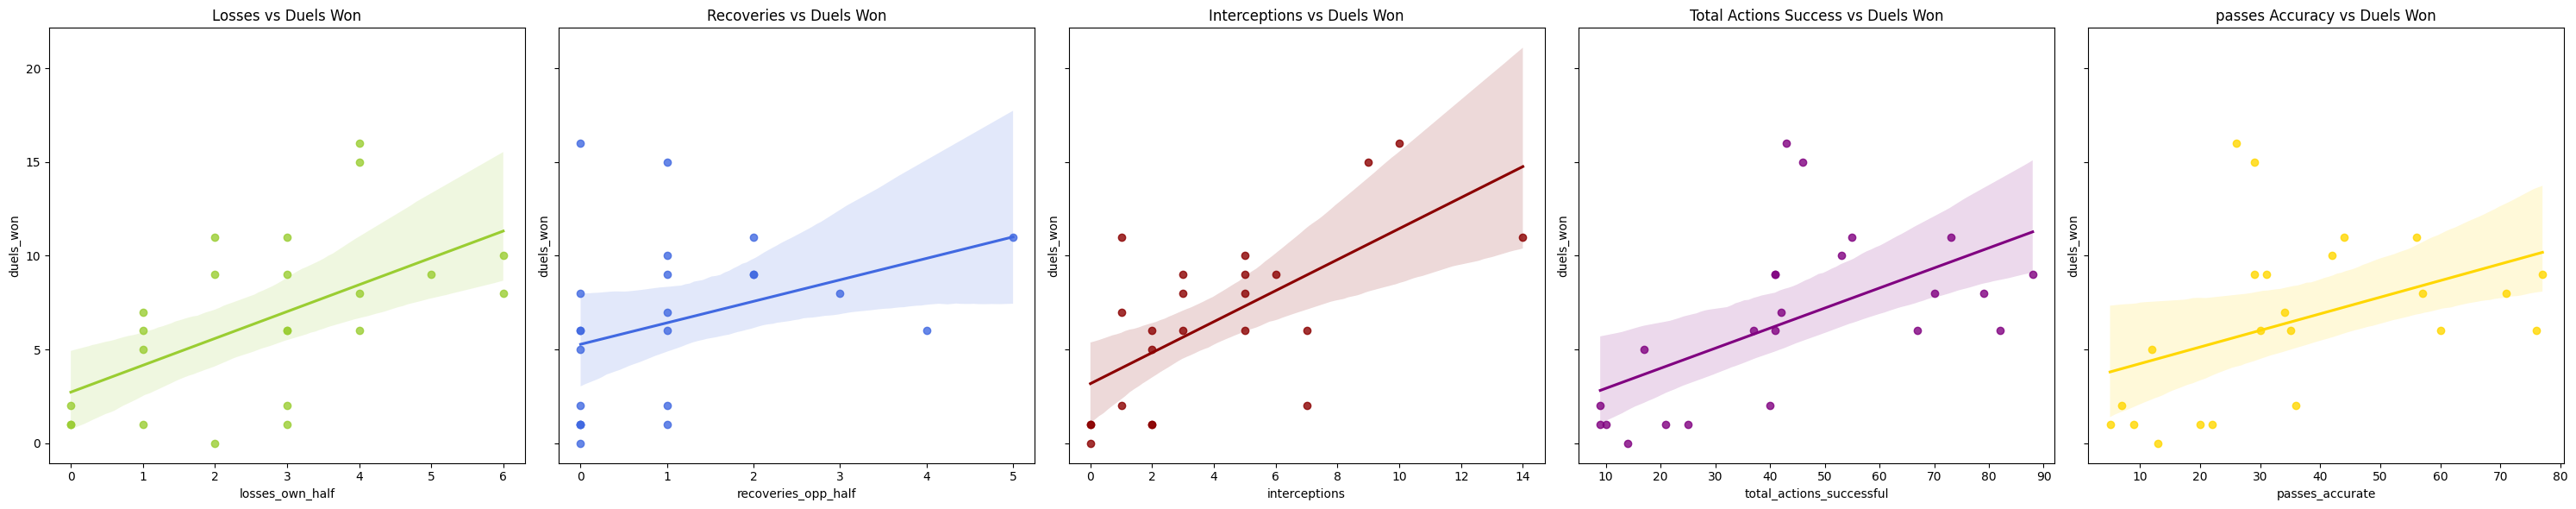

In [ ]:
import statsmodels.api as sm

# Defining the independent variables
X = normalized_df[['losses_own_half', 'recoveries_opp_half', 'interceptions', 'total_actions_successful', 'passes_accurate']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['duels_won']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(30, 6))

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, ax=axs[0], color='yellowgreen')
axs[0].set_title('Losses vs Duels Won')

sns.regplot(x='recoveries_opp_half', y='duels_won', data=normalized_df, ax=axs[1], color='royalblue')
axs[1].set_title('Recoveries vs Duels Won')

sns.regplot(x='interceptions', y='duels_won', data=normalized_df, ax=axs[2], color='darkred')
axs[2].set_title('Interceptions vs Duels Won')

sns.regplot(x='total_actions_successful', y='duels_won', data=normalized_df, ax=axs[3], color='purple')
axs[3].set_title('Total Actions Success vs Duels Won')

sns.regplot(x='passes_accurate', y='duels_won', data=normalized_df, ax=axs[4], color='gold')
axs[4].set_title('passes Accuracy vs Duels Won')

plt.tight_layout()
plt.show()

## Linear Regression with Sci-kit Learn

### The linear regression model is represented as:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$

### Based on Total Actions

Mean r^2 over all K-Fold folds: 0.9852323931930227
Coefficients:
recoveries_opp_half: 0.638700348909352
losses_own_half: 0.3337427801601369
passes_accurate: 0.9917196752900732
interceptions: -0.3675844570428123
duels_won: 1.078126944129033
Mean squared error: 6.08
Coefficient of determination: 0.99


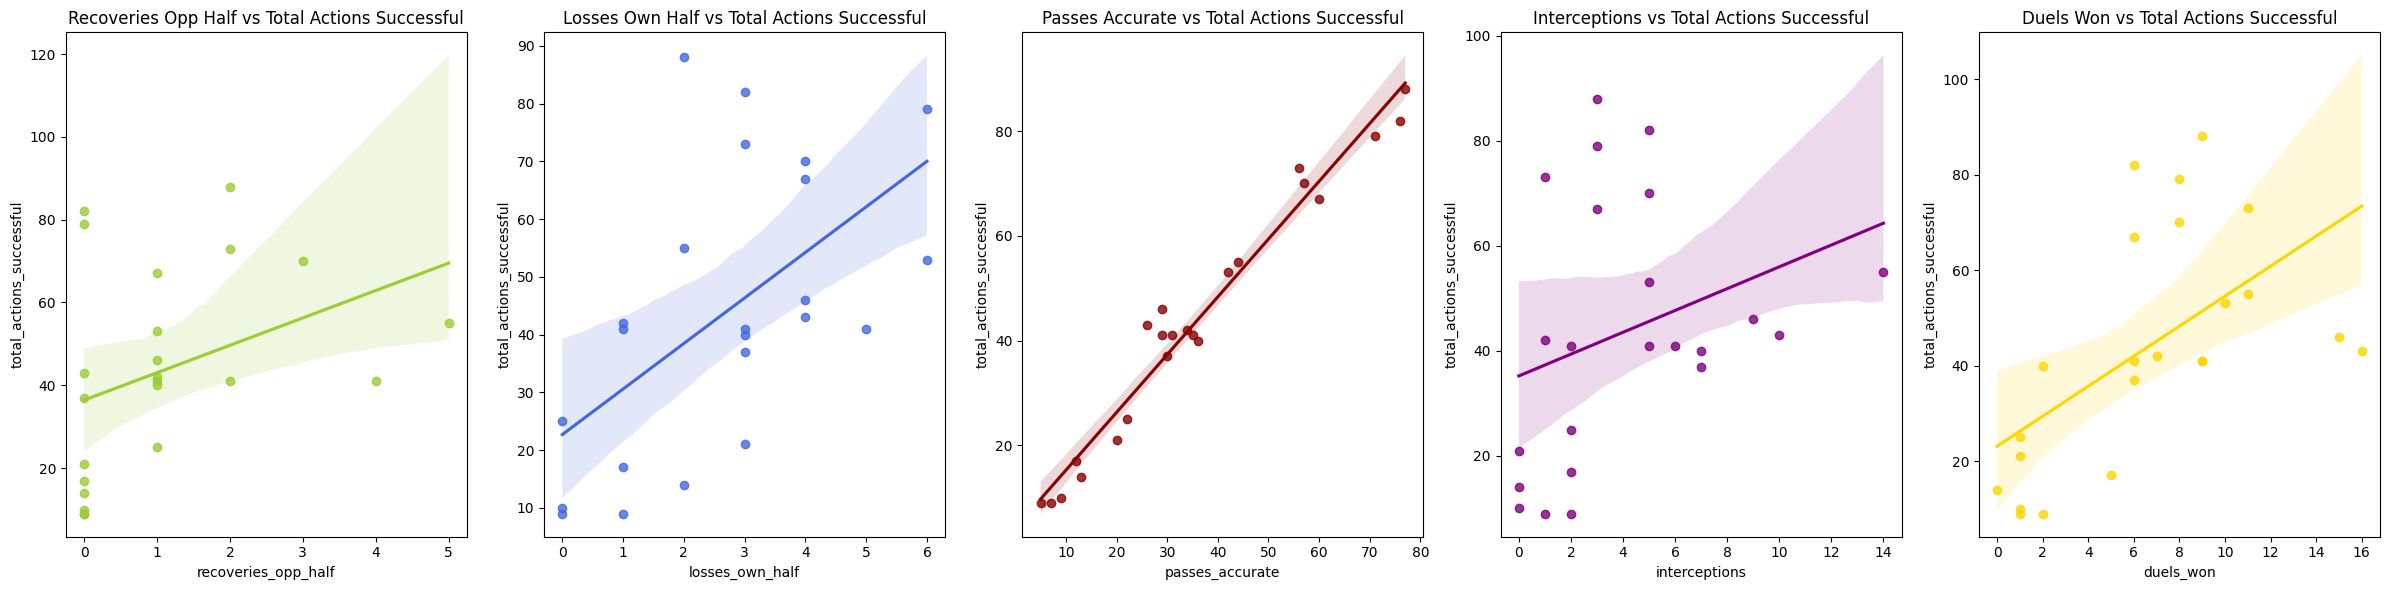

In [ ]:
# Prepare the data
X = normalized_df[['recoveries_opp_half', 'losses_own_half', 'passes_accurate', 'interceptions', 'duels_won']]
y = normalized_df['total_actions_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['recoveries_opp_half', 'losses_own_half', 'passes_accurate', 'interceptions', 'duels_won']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(24, 6))

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Recoveries Opp Half vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Losses Own Half vs Total Actions Successful')

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Interceptions vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Duels Won vs Total Actions Successful')

plt.tight_layout()
plt.show()

Recoveries in Opponent's Half (0.63): this positive coefficient underscores that recoveries in the opponent's half are a strong contributor to Nacho's total actions. On football optics, this highlights Nacho's proactive and aggressive defensive style, where he actively engages the opponent in their half, a key trait of a modern and tenacious midfielder or defender.

Losses in Own Half (0.33): Statistically, this positive value indicates that losses in Nacho's own half are also linked to his total actions, albeit this might need contextual interpretation. On football optics, it could reflect his involvement in riskier plays or attempting to initiate attacking moves from deep, an indication of his bravery and willingness to take part in constructive plays.

Accurate Passes (0.99): The statistical analysis shows a strong correlation between Nacho's accurate passes and his total actions, emphasizing his ability to retain and distribute the ball. On football optics, this showcases his role as a reliable player in possession, connecting different phases of the game and contributing to the overall flow and tempo of his team's play.

Interceptions (-0.36): Statistically, this negative coefficient suggests a limited or inverse relationship with Nacho's total actions. On football optics, it might mean that while interceptions are part of his defensive responsibilities, they are not the primary factor defining his playing style, with other aspects taking precedence.

Duels Won (1.07): From a statistical angle, the strong positive coefficient for duels won confirms this aspect as significant to Nacho's total actions. On football optics, it accentuates his combative nature and ability to win one-on-one battles, a clear testament to his physical prowess and competitive attitude on the pitch.

Overall, the model for Ignacio Fernandez "Nacho" paints a comprehensive picture with a mean r^2 value of 0.98 and a coefficient of determination of 0.99, supported by a mean squared error of 6.08.

These coefficients illustrate Nacho as a versatile and well-rounded player, with key strengths in recoveries, passing accuracy, and duels won. The data integrates well with the footballing perspective, underscoring his ability to balance defensive diligence with constructive offensive participation. Nacho's model exemplifies a player capable of influencing various facets of the game, symbolizing a modern, adaptive footballer that contributes significantly to both defensive and offensive aspects. It's a statistical reflection of a player that combines intelligence, technique, and physicality in a coherent and effective manner.

### Based on Pass Accuracy

Mean r^2 over all K-Fold folds: 0.9798413509956765
Coefficients:
total_actions_successful: 1.0028232785917834
losses_own_half: -0.317086211352531
recoveries_opp_half: -0.6008550390500592
interceptions: 0.35892113592424046
duels_won: -1.0759141367715122
Mean squared error: 6.04
Coefficient of determination: 0.99


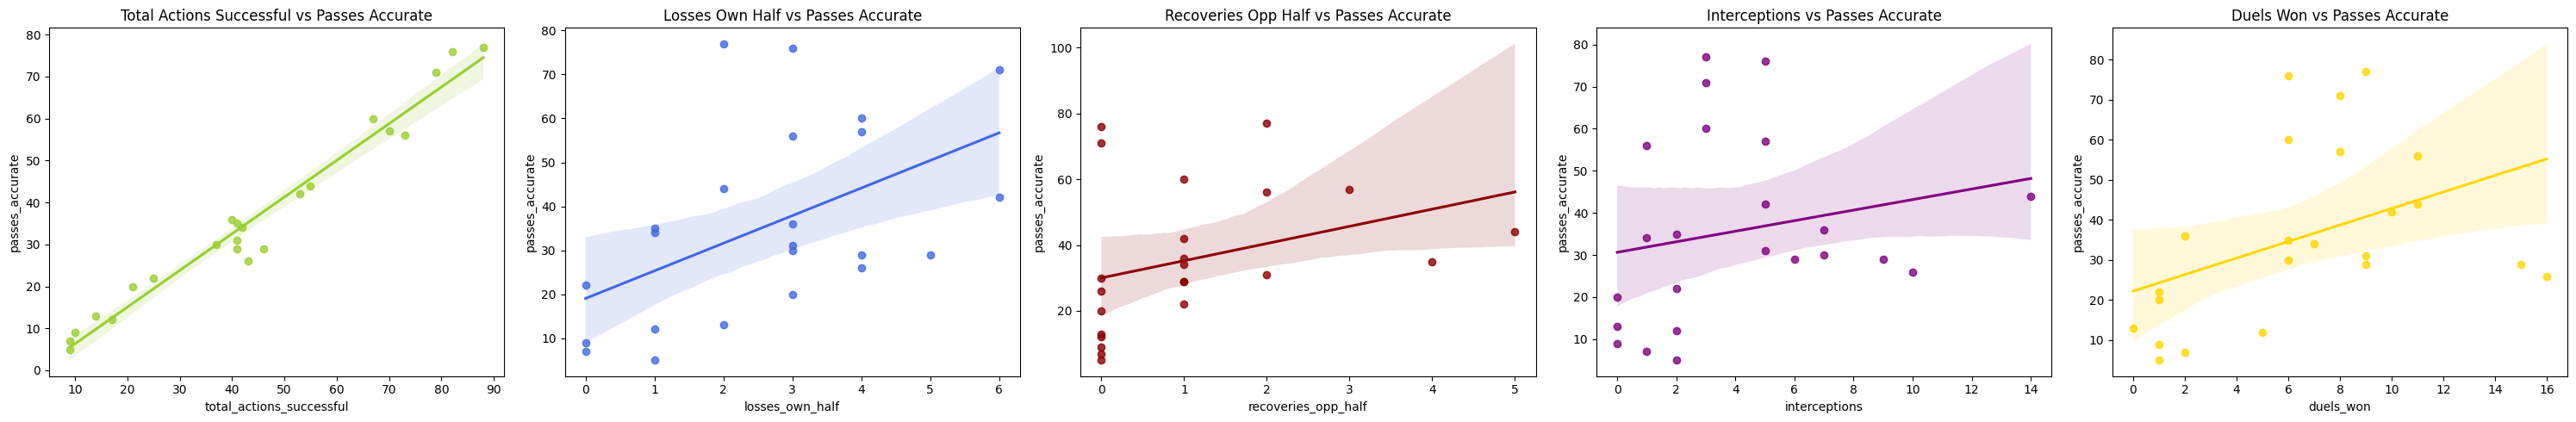

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'duels_won']]
y = normalized_df['passes_accurate']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['total_actions_successful', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'duels_won']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(30, 5))

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Total Actions Successful vs Passes Accurate')

sns.regplot(x='losses_own_half', y='passes_accurate', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Losses Own Half vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Recoveries Opp Half vs Passes Accurate')

sns.regplot(x='interceptions', y='passes_accurate', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Interceptions vs Passes Accurate')

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Duels Won vs Passes Accurate')

plt.tight_layout()
plt.show()

Total Successful Actions (1.00): the strong positive correlation with pass accuracy reveals that successful actions are a pivotal aspect of Nacho's gameplay. On football optics, this manifests in his ability to complete crucial plays, whether in defense or linking up in attack, underlining his technical proficiency and adaptability on the field.

Losses in Own Half (-0.317): Statistically, this negative coefficient emphasizes that losses in his own half are detrimental to Nacho's pass accuracy. On football optics, it indicates a need to manage risk in defensive areas, as losing possession in these zones can be particularly harmful, and reflects a player focused on security and responsibility in deeper positions.

Recoveries in Opponent's Half (-0.60): The negative value here statistically signifies an inverse relationship with pass accuracy, which might seem counterintuitive. On football optics, it could imply that while Nacho is aggressive in recovering the ball, this might lead to more challenging passing scenarios or rushed decisions, an intriguing aspect of his more adventurous playing style.

Duels Won (-1.07): The negative value here statistically indicates that winning duels has an inverse relationship with pass accuracy for Nacho. On football optics, this might reflect situations where winning physical battles leads to more complex passing situations or a prioritization of other aspects over pure passing finesse, offering a nuanced insight into his more combative playing characteristics.

Overall, the model for Ignacio Fernandez "Nacho" based on Pass Accuracy yields a robust mean r^2 value of 0.97, a coefficient of determination of 0.99, and a mean squared error of 6.04.

The coefficients depict a player who is adept in various areas of the game, with an intriguing balance between physicality, intelligence, and technical skill. The statistical insights align with the footballing interpretation, painting Nacho as a key contributor who combines defensive awareness with successful actions, while also revealing complex relationships with recoveries and duels won. The data offers a multifaceted view of a player that excels in both maintaining possession and executing critical defensive tasks, making Nacho an integral part of his team's tactical structure. It emphasizes a player whose performances are characterized by versatility, commitment, and intelligence.

### Based on Duels Won

Mean r^2 over all K-Fold folds: 0.778338738933754
Coefficients:
losses_own_half: -0.1073546034546632
recoveries_opp_half: -0.4837246004052923
interceptions: 0.3639612470653305
total_actions_successful: 0.8108392623608165
passes_accurate: -0.8002155873155045
Mean squared error: 4.09
Coefficient of determination: 0.47


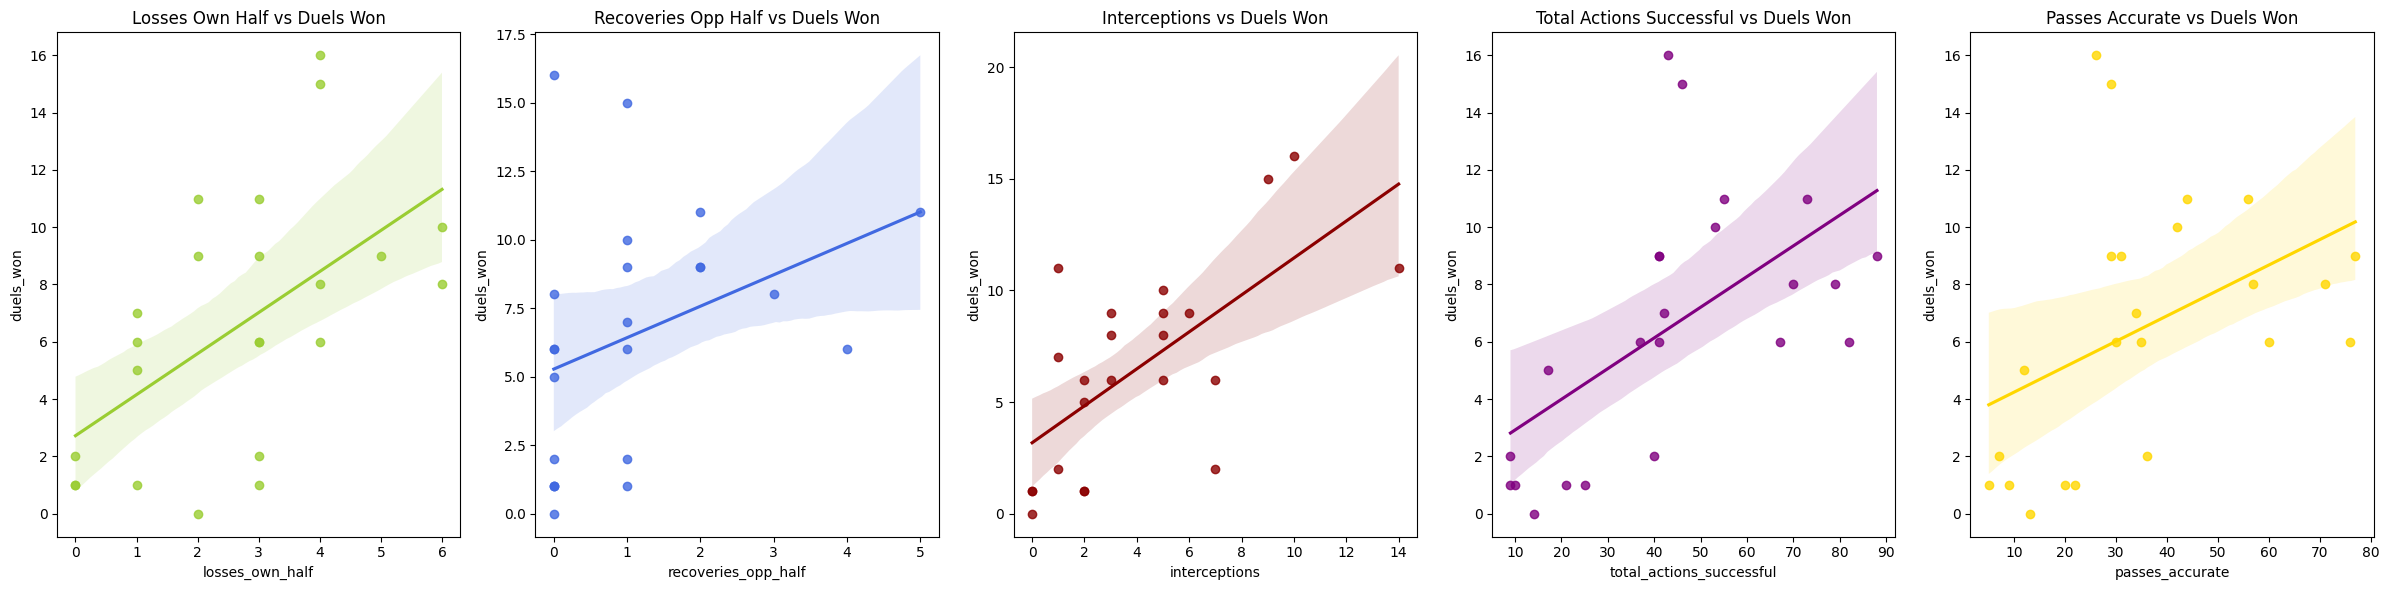

In [ ]:
# Prepare the data
X = normalized_df[['losses_own_half', 'recoveries_opp_half', 'interceptions', 'total_actions_successful', 'passes_accurate']]
y = normalized_df['duels_won']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['losses_own_half', 'recoveries_opp_half', 'interceptions', 'total_actions_successful', 'passes_accurate']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(24, 6))

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Losses Own Half vs Duels Won')

sns.regplot(x='recoveries_opp_half', y='duels_won', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Recoveries Opp Half vs Duels Won')

sns.regplot(x='interceptions', y='duels_won', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Interceptions vs Duels Won')

sns.regplot(x='total_actions_successful', y='duels_won', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Total Actions Successful vs Duels Won')

sns.regplot(x='passes_accurate', y='duels_won', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Passes Accurate vs Duels Won')

plt.tight_layout()
plt.show()

Losses in Own Half (-0.10): Statistically, this negative coefficient suggests that losses in Nacho's own half are inversely related to the number of duels he wins. On football optics, this emphasizes his focus on maintaining possession and reducing errors in defensive areas, reflecting a disciplined approach to defending that avoids unnecessary risks.

Recoveries in Opponent's Half (-0.48): From a data scientist's view, the negative correlation implies that recoveries in the opponent's half are not conducive to winning duels. On football optics, this could indicate that aggressive pressing might lead to less success in physical contests, highlighting a strategic balance Nacho needs to find between assertiveness and control in attacking areas.

Interceptions (0.36): Statistically, the positive value here reveals that interceptions contribute positively to winning duels, signifying Nacho's ability to read the game. On football optics, it emphasizes his sharp understanding of positioning and timing, vital attributes in winning challenges and dominating individual battles.

Total Successful Actions (0.81): The strong positive correlation with duels won emphasizes the significance of successful actions in Nacho's gameplay. On football optics, this manifests as a combination of skill, intelligence, and athleticism, and underlines his overall contribution to both defensive solidity and attacking efficiency.

Passes Accurate (-0.80): From a statistical angle, this negative coefficient indicates that accurate passing is inversely related to winning duels. On football optics, it may reflect Nacho's playing style, where successful duels might lead to less focus on pinpoint passing, and instead, a preference for more direct or aggressive plays.

Overall, the model for Ignacio Fernandez "Nacho" based on Duels Won yields a mean r^2 value of 0.77, a coefficient of determination of 0.47, and a mean squared error of 4.09. This analysis reveals a multifaceted view of Nacho's playing style. He emerges as a player with a unique blend of defensive acumen, physicality, and tactical intelligence. The negative coefficients with recoveries in the opponent's half and accurate passes provide a nuanced understanding of his approach to duels, emphasizing an assertive but controlled style of play.

In summary, the model's insights align well with the footballing interpretation, depicting Nacho as a player adept at winning individual battles and contributing significantly to his team's overall performance through a blend of skill, intelligence, and determination. His role as a key defensive asset is reinforced by his ability to balance aggressiveness with tactical discipline, making him an invaluable asset to his team's defensive structure.

## XGBoost & Cross-Validation

### The prediction for XGBoost is given by:

$$ \hat{y} = \sum_{k=1}^{K} f_k(x) $$

where $$ f_k(x) $$ is the prediction of the $$ k $$-th weak learner.

### Based on Total Actions 

Mean squared error: 4.09
Coefficient of determination: 0.99
Cross-Validation Mean Score: 0.93


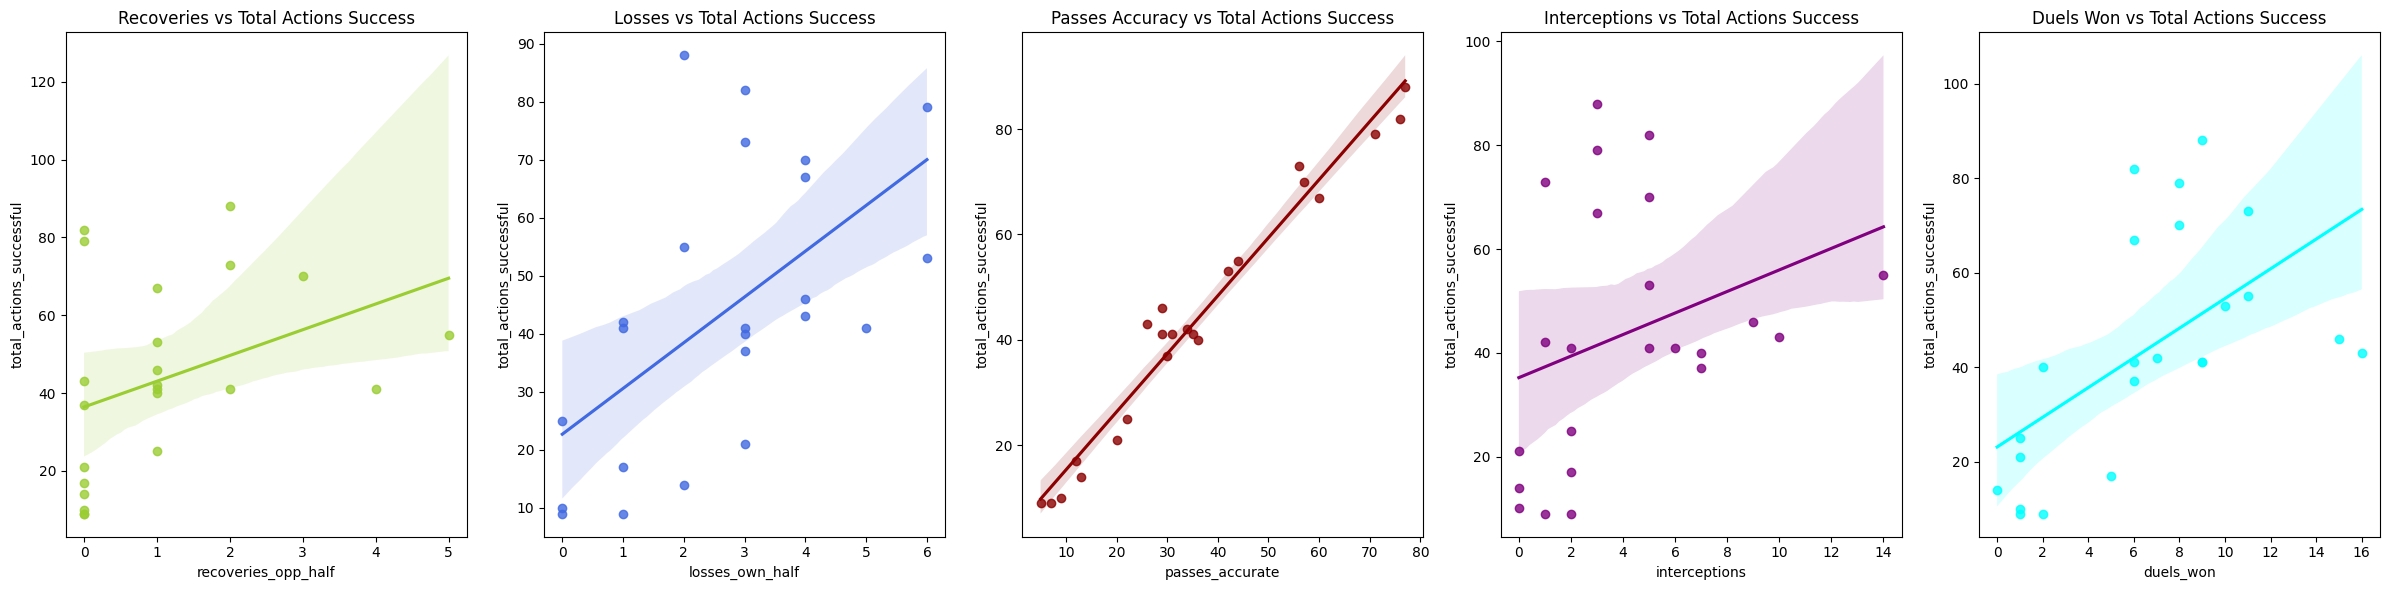

In [ ]:
# Prepare the data
X = normalized_df[['recoveries_opp_half', 'losses_own_half', 'passes_accurate', 'interceptions', 'duels_won']]
y = normalized_df['total_actions_successful']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost regression object
model = XGBRegressor()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Calculate and display the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f' % mse)

# Calculate and display the coefficient of determination
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination: %.2f' % r2)

# Perform 5-fold cross validation and display mean score
scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Mean Score: %.2f' % scores.mean())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(24, 6))

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Recoveries vs Total Actions Success')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Losses vs Total Actions Success')

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Passes Accuracy vs Total Actions Success')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Interceptions vs Total Actions Success')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='cyan', ax=axs[4])
axs[4].set_title('Duels Won vs Total Actions Success')

plt.tight_layout()
plt.show()

The XGBoost Regression model yields a Mean Squared Error (MSE) of 4.09. The MSE is used to measure the differences between values predicted by the model and the actual values. In this case, the MSE of 4.09 suggests that the model has a reasonable level of accuracy, although there might still be room for improvement.

The Coefficient of Determination (R-squared) is 0.99. This statistic explains the extent to which changes in the dependent variable (in this case, Nacho's successful actions) can be explained by the independent variables (the different features like accurate passes, recoveries, interceptions, etc.). An R-squared of 0.99 means that 99% of the variation in Nacho's successful actions can be explained by these features. This is an incredibly high value, suggesting that the model has a very strong fit.

For the cross-validation, we use it to assess the predictive performance of the model and to judge how it performs outside the sample to a new dataset, also known as test data. The mean score of the cross-validation being 0.93 indicates that the model has shown high predictive power on unseen data.

On football optics, the XGBoost model suggests that the selected features provide a comprehensive understanding of factors affecting Nacho's successful actions on the field. With an R-squared of 0.99, we can say that these factors, such as accurate passes, recoveries, etc., are indeed key elements of Nacho's performance. The high cross-validation score further solidifies this statement as it shows that the model holds up well when applied to new, unseen data. This is helpful for future predictions and developing strategies that could further enhance Nacho's performance.

### Based on Pass Accuracy 

Mean squared error: 10.01
Coefficient of determination: 0.98
Cross-Validation Mean Score: 0.96


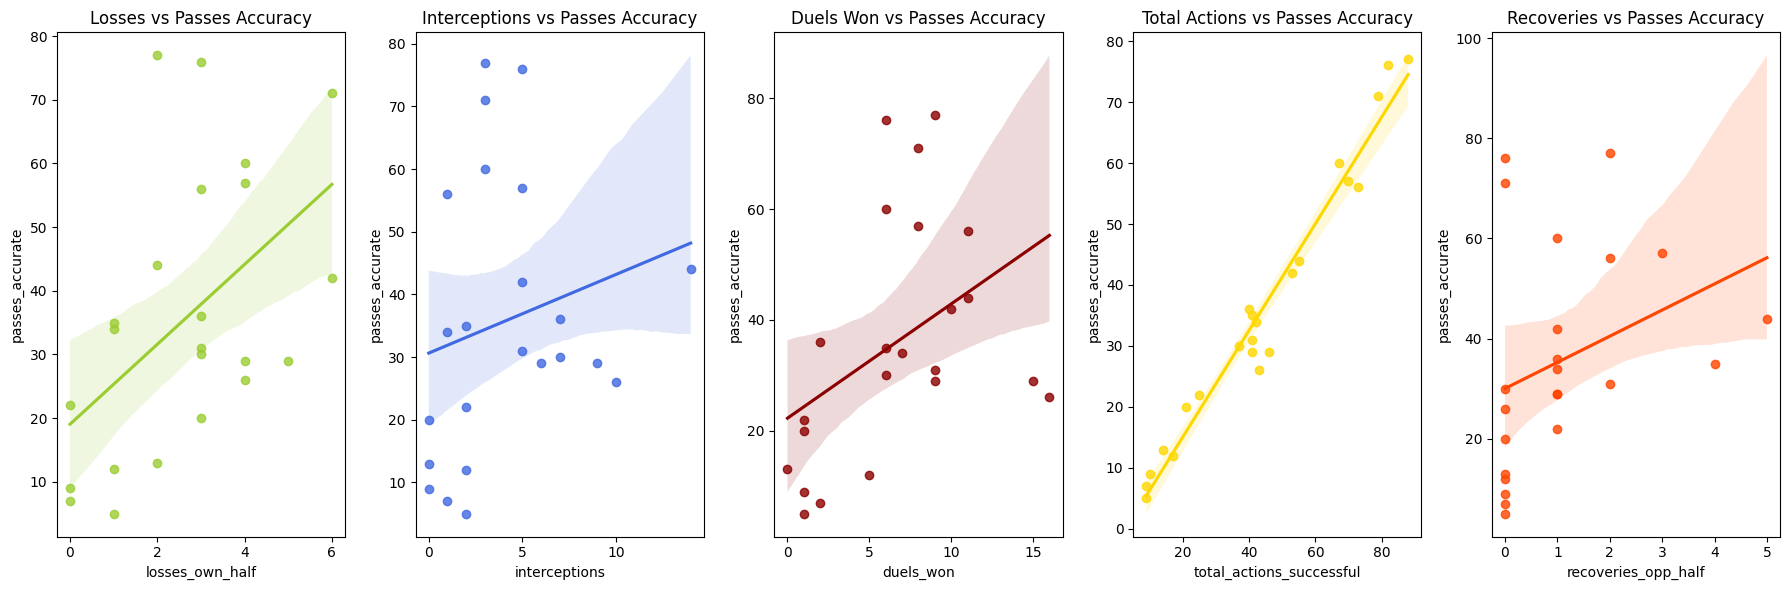

In [ ]:
# Prepare the data
X = normalized_df[['losses_own_half', 'total_actions_successful', 'recoveries_opp_half', 'interceptions', 'duels_won']]
y = normalized_df['passes_accurate']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost regression object
model = XGBRegressor()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Calculate and display the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f' % mse)

# Calculate and display the coefficient of determination
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination: %.2f' % r2)

# Perform 5-fold cross validation and display mean score
scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Mean Score: %.2f' % scores.mean())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(18, 6))

sns.regplot(x='losses_own_half', y='passes_accurate', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Losses vs Passes Accuracy')

sns.regplot(x='interceptions', y='passes_accurate', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Interceptions vs Passes Accuracy')

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Duels Won vs Passes Accuracy')

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, color='gold', ax=axs[3])
axs[3].set_title('Total Actions vs Passes Accuracy')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, color='orangered', ax=axs[4])
axs[4].set_title('Recoveries vs Passes Accuracy')

plt.tight_layout()
plt.show()

Mean Squared Error (MSE) (10.01): an MSE of 10.01, without context on the scale of the dependent variable, may or may not be significant. If the dependent variable has a large range, this error might be acceptable; otherwise, it could indicate discrepancies in predictions. The error measure alone doesn't provide a full picture, so it must be assessed in conjunction with other metrics. On football optics, This error may imply certain games or situations where Nacho's passing accuracy diverges from what the model predicts. It could be related to the specific role he's playing in a match, the quality of the opposition, or other tactical factors that influence his passing choices.

Coefficient of Determination (R^2) (0.98): an R^2 value of 0.98 is impressive, indicating that the model explains approximately 98% of the variance in Nacho's pass accuracy. This reveals a very strong model fit and suggests that the features chosen for this model are highly predictive of the underlying pattern. On football optics, this high R^2 value demonstrates that the model accurately captures Nacho's ability to execute accurate passes. It reflects his technical proficiency and understanding of the game, allowing him to find teammates with precision, whether through short connections or longer, more challenging passes.

Cross-Validation Mean Score (0.96): a mean cross-validation score of 0.96 further confirms the model's robustness. Cross-validation provides insights into how well the model performs on unseen data, and a score close to 1 indicates excellent generalization ability. On football optics, This score may symbolize Nacho's consistent passing ability across various matches and situations. It suggests that regardless of the opposition or game context, Nacho's pass accuracy remains a reliable aspect of his play.

In summary, the XGBoost Regressor Model based on pass accuracy for Nacho indicates strong predictive power and alignment with the observed data. The model seems to capture Nacho's strengths as a passer, reflecting his technical ability and decision-making on the field. From a football perspective, it emphasizes Nacho's vital role in maintaining possession and dictating the flow of the game. His precise and consistent passing ability is effectively translated into quantitative metrics through this model, showcasing his value as a player.

### Based on Duels Won

Mean squared error: 4.27
Coefficient of determination: 0.53
Cross-Validation Mean Score: -0.72


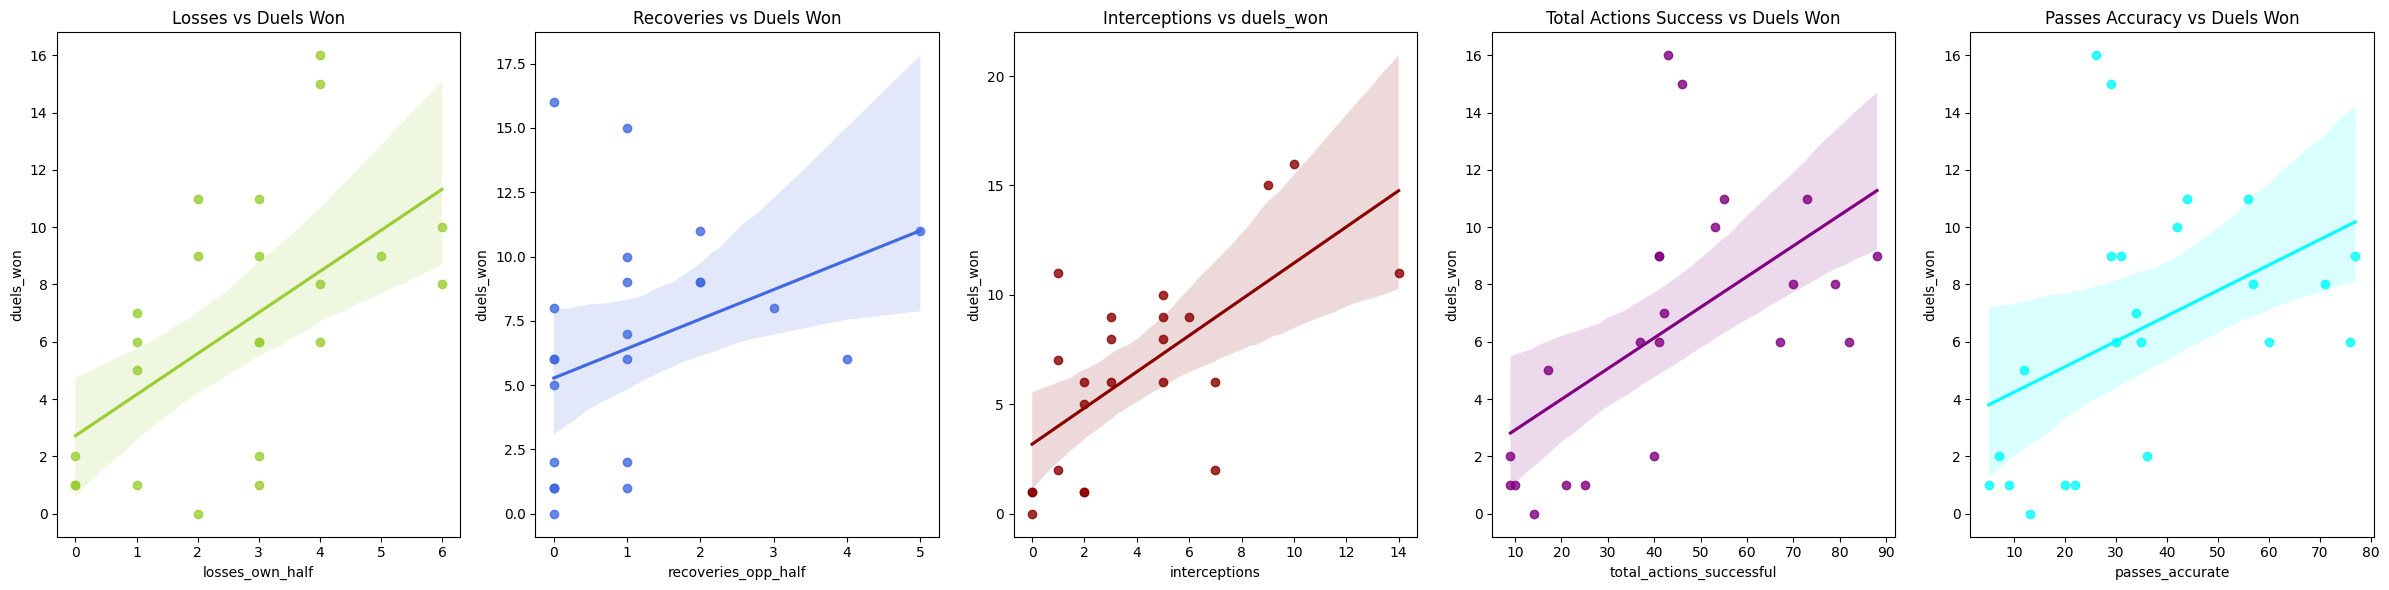

In [ ]:
# Prepare the data
X = normalized_df[['losses_own_half', 'recoveries_opp_half', 'interceptions', 'total_actions_successful', 'passes_accurate']]
y = normalized_df['duels_won']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost regression object
model = XGBRegressor()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Calculate and display the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f' % mse)

# Calculate and display the coefficient of determination
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination: %.2f' % r2)

# Perform 5-fold cross validation and display mean score
scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Mean Score: %.2f' % scores.mean())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(24, 6))

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Losses vs Duels Won')

sns.regplot(x='recoveries_opp_half', y='duels_won', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Recoveries vs Duels Won')

sns.regplot(x='interceptions', y='duels_won', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Interceptions vs duels_won')

sns.regplot(x='total_actions_successful', y='duels_won', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Total Actions Success vs Duels Won')

sns.regplot(x='passes_accurate', y='duels_won', data=normalized_df, color='cyan', ax=axs[4])
axs[4].set_title('Passes Accuracy vs Duels Won')

plt.tight_layout()
plt.show()

Mean Squared Error (MSE) (4.27): an MSE of 4.27 may indicate a moderate level of prediction error, depending on the scale of the dependent variable. This error metric emphasizes the magnitude of the discrepancies and could imply that the model occasionally makes substantial errors in predicting Nacho's duels won. On football optics, This error level might point to situations where Nacho's actual performance in duels varies significantly from what the model predicts. Duels involve a complex interplay of physicality, technique, and mental sharpness, which might not be fully encapsulated by the model.

Coefficient of Determination (R^2) (0.53): an R^2 value of 0.53 means that the model explains around 53% of the variance in Nacho's duels won. While this is better than a model with no predictive power, it's far from perfect and indicates that a significant portion of the variability remains unexplained.
On football optics, This R^2 value suggests that the model captures some aspects of Nacho's ability to win duels but leaves a lot unexplained. The missing variance could be related to the nuances of his playing style, the tactical setup, or other situational factors that affect how he engages in duels during a match.

Cross-Validation Mean Score (-0.72): a negative mean cross-validation score of -0.72 is a concerning sign. It indicates that the model performs worse than a constant baseline on unseen data, which could point to severe overfitting or a model misspecification. On football optics, This negative score might highlight the complex and highly situational nature of duels in football. Nacho's performance in duels may vary significantly across different games, depending on the opposition's strength, tactical approach, and other contextual factors that are not captured by the model.

In summary, the XGBoost Regressor Model based on duels won for Nacho reveals some serious shortcomings. While it explains some of the variance in the data, the negative cross-validation score and the remaining unexplained variance point to potential issues. From a football perspective, it emphasizes the multifaceted nature of duels and the difficulty in quantifying them through a simple model. Improving this model might require more nuanced features, better data representation, or additional domain knowledge about Nacho's specific playing style and the dynamics of duels in football.

## Conformal Predictions

### provides a prediction interval such that:

$$ P(y \in [L(x), U(x)]) = 1 - \alpha $$

where $$ L(x) $$ and $$ U(x) $$ are the lower and upper bounds of the prediction interval, and $$ \alpha $$ is the significance level.

### Based on Total Actions

Prediction interval coverage: 33.19%
Average prediction interval width: 3.38


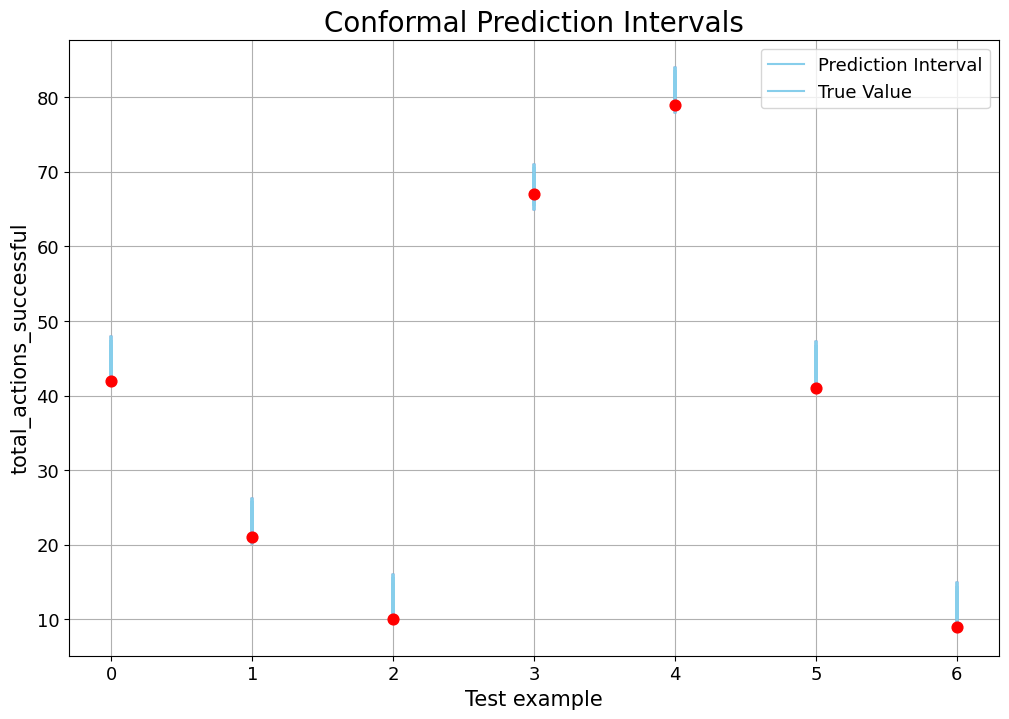

In [ ]:
# Prepare the data
X = normalized_df[['losses_own_half','passes_accurate', 'interceptions', 'duels_won']]
y = normalized_df['total_actions_successful']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('total_actions_successful', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (33.19%): is considerably low and indicates that the model's predicted intervals only contain approximately one-third of the actual observed Total Actions for Nacho. Such a low coverage rate can signal several potential issues, such as inappropriate feature selection, model mis-specification, or a lack of representativeness in the data used to train the model. It could also point to Total Actions being a more complex and multifaceted aspect to model for this player. A detailed examination of the model assumptions, feature engineering, and validation techniques will likely be necessary to identify and address the root cause of this discrepancy. On football optics, indicates a significant disconnect between the model's predictions and Nacho's actual performance on the field. Total Actions encompass a broad spectrum of a player's contributions, and this low coverage may hint at inconsistencies or a lack of a well-defined role for Nacho within his team's tactical setup. This outcome may raise questions about Nacho's utilization and areas where his performance varies widely from game to game.

Average prediction interval width (3.38):suggests a model that is neither capturing the essential dynamics of Total Actions for Nacho nor providing precise predictions. The relatively wide interval width can be seen as an attempt by the model to capture more variability, yet it still falls short in coverage. This result points to a deeper underlying issue that might require reevaluation of the features, data preprocessing, or model architecture to create a more accurate and reliable prediction model for Nacho's Total Actions. On football optics, In football terms, an average prediction interval width of 3.38, combined with low coverage, might mirror Nacho's fluctuating role and performance in different matches. It could reflect the challenges of quantifying his specific contributions to the game, particularly if he is employed in various positions or tactical systems. Understanding the nature of these Total Actions and how they align with his team's overall strategy might provide more clarity on how to interpret this wide interval and low coverage.

In conclusion, the outcomes for Nacho's Total Actions present a complex scenario that highlights potential limitations and challenges in the current modeling approach. Further investigation into both the statistical modeling and footballing aspects is warranted to derive meaningful insights from these results. Refining the model with an in-depth understanding of Nacho's playing style, role, and contributions could lead to more accurate and relevant predictions that align with his performance on the field. 

### Based on Pass Accuracy 

Prediction interval coverage: 54.69%
Average prediction interval width: 31.58


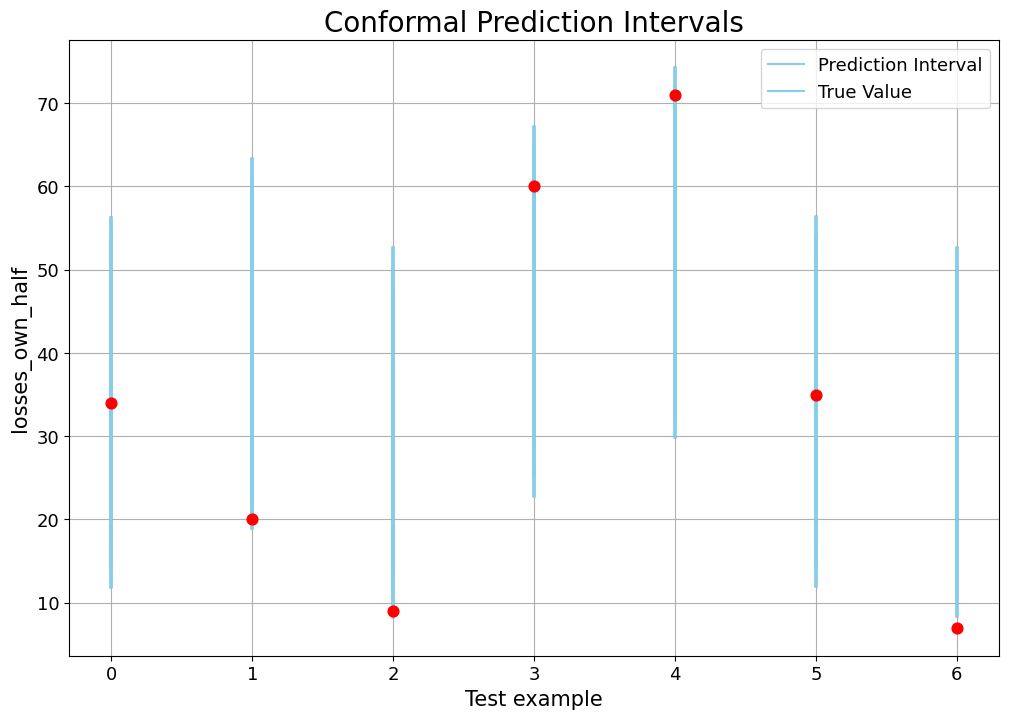

In [ ]:
# Prepare the data
X = normalized_df[['losses_own_half', 'interceptions']]
y = normalized_df['passes_accurate']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('losses_own_half', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (54.69%): a prediction interval coverage of 54.69% for Pass Accuracy is relatively low, and this figure suggests that the model's predicted intervals encompass just over half of the actual observed Pass Accuracy for Nacho. This outcome may indicate that the current features and model configuration are not fully capturing the intricacies of Nacho's passing game. It could be due to a variety of reasons, including missing influential features, incorrect model assumptions, or inconsistency in the player's performance that the model fails to capture. It would be valuable to reassess the model architecture, features, and the data's quality to identify potential improvements. On football optics, may reflect the variability in Nacho's passing game. His involvement in various positions and the complexity of his team's passing patterns might contribute to this unpredictability. This outcome might hint at a need to assess Nacho's role within the team's tactical setup and understand the specific scenarios where his passing accuracy fluctuates, such as different game phases or opponent strategies.

Average prediction interval width (31.58): an average prediction interval width of 31.58 is relatively wide, especially in the context of Pass Accuracy. This wide interval may signal a high level of uncertainty in the model's predictions for Nacho's passing game. The width could be reflective of the model's struggle to pinpoint specific influences on his Pass Accuracy. It also raises questions about the appropriateness of the model or the features selected, as a wide interval is generally undesirable when we seek precise predictions. Investigating alternative features or model approaches that capture the dynamics of Nacho's passing could be a fruitful direction. On football optics, could represent a significant variation in his passing game. This might align with his multifaceted role within the team, where his passing decisions and success rates may vary widely depending on his position, the opponents, and the game's context. Understanding this wide interval from a tactical standpoint might require a more granular analysis of Nacho's passing patterns, decision-making, and the situational factors influencing his accuracy.

In summary, the outcomes related to Pass Accuracy for Nacho present both challenges and opportunities for analysis. The relatively low coverage and wide prediction interval width point to areas where the current model may be falling short in accurately capturing Nacho's passing abilities. Both statistical refinement and a deeper understanding of his role and performance within the footballing context may be necessary to develop a more accurate and insightful prediction model for this player. 

### Based on Duels Won

Prediction interval coverage: 66.67%
Average prediction interval width: 2.52


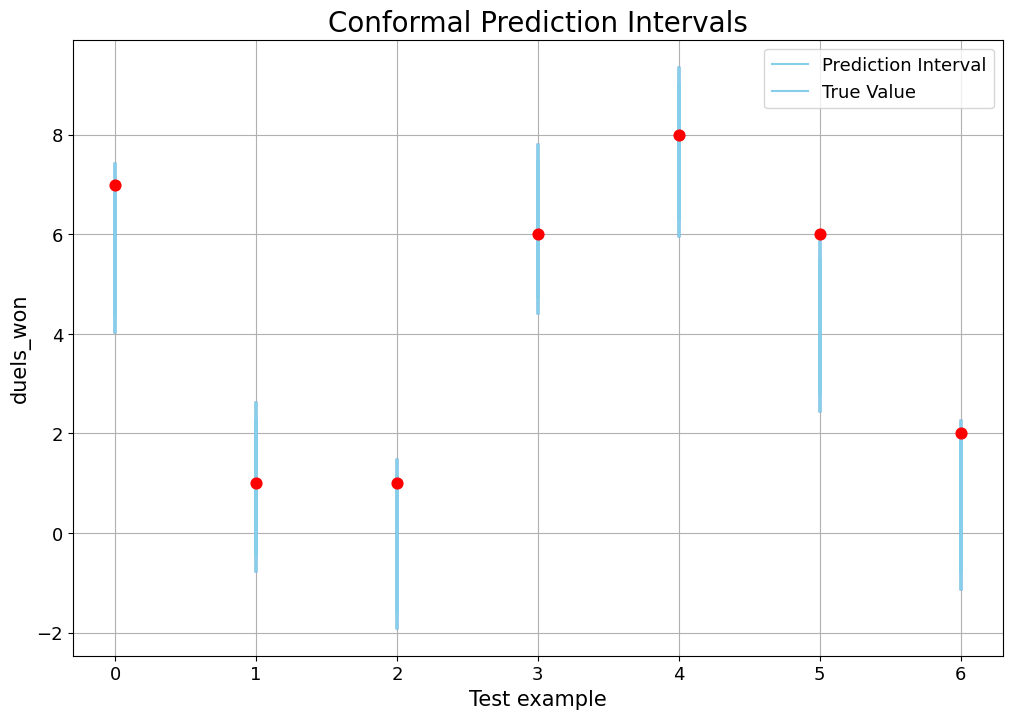

In [ ]:
# Prepare the data
X = normalized_df[['losses_own_half', 'total_actions_successful', 'passes_accurate']]
y = normalized_df['duels_won']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('duels_won', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (66.67%): is relatively good, encompassing two-thirds of the observed outcomes for Nacho. It shows that the model is moderately effective in capturing the variation and trends in Nacho's dueling ability. However, achieving a higher coverage might require further analysis and refinement, possibly through additional feature engineering, adjustment of model hyperparameters, or exploration of different algorithms. Analyzing the distribution of the residuals and understanding which types of duels are not well-captured can provide insights for improvement. On football optics, showcases Nacho's general capability in one-on-one encounters, be it in defensive tackles or aerial challenges. However, this level of coverage might indicate room for inconsistency, perhaps stemming from different opponents' strengths or varying roles within his team. Understanding the specific scenarios where Nacho's performance varies can be crucial for tactical planning and player development.

Average prediction interval width (2.52): is indicative of a reasonable level of precision in the predictions for Nacho's Duels Won. This width suggests a balance between capturing variability and maintaining confidence in predictions. The choice of features and model architecture seems to provide a suitable representation of the complexity of duels. Further refinement could potentially narrow this interval, but careful validation is needed to ensure that the model does not become overfit or lose its interpretability. On football optics, an average prediction interval width of 2.52 for Duels Won reflects Nacho's ability to maintain a consistent level of performance in duels across different matches and situations. This narrow width might illustrate his technical quality and decision-making in both offensive and defensive scenarios. It emphasizes his role as a reliable asset, capable of winning challenges that contribute to possession recovery and offensive build-up.

In conclusion, the outcomes related to Duels Won for Nacho offer valuable insights into both his playing style and the model's adequacy in representing this attribute. The moderate coverage and specific prediction interval width give a comprehensive picture of Nacho's ability in duels, shedding light on his contributions in various on-field situations. These insights could be valuable in tactical planning and player development, along with further fine-tuning of the statistical model for even more precise predictions. 

## Radar Map Visualization

### PSG 2022 - Nacho Performance

- Total Action Successful (TAS):(55-41) -> 75 %

- Pass Accuracy (PA): (38-35) -> 92 %

- Long Passes Accurate (LPA): (3-2) -> 67 %

- Duels won (DW): (12-6) -> 50 %

- Aerial Duels Won (ADW): (1-0) -> 0 %

- Own Losses (LOH): (3-1) -> 33 %

- Recoveries (ROPH): (6-4) -> 67 %

- Interceptions (INT): %

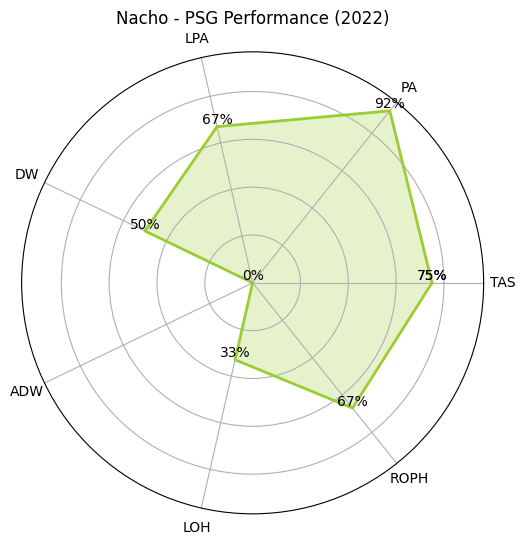

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'ADW','LOH', 'ROPH'])
stats = np.array([75, 92, 67, 50, 0, 33, 67])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Nacho - PSG Performance (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='yellowgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='yellowgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Chelsea 1st Leg 2022 - Nacho Performance

- Total Action Successful (TAS):(55-41) -> 75 %

- Pass Accuracy (PA): (38-35) -> 92 %

- Long Passes Accurate (LPA): (3-2) -> 67 %

- Duels won (DW): (12-6) -> 50 %

- Aerial Duels Won (ADW): (1-0) -> 0 %

- Own Losses (LOH): (3-1) -> 33 %

- Recoveries (ROPH): (6-4) -> 67 %

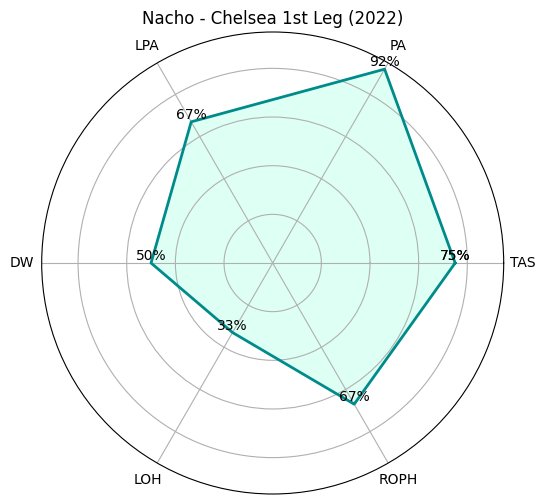

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW','LOH', 'ROPH'])
stats = np.array([75, 92, 67, 50, 33, 67])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Nacho - Chelsea 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='aquamarine', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='darkcyan', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Chelsea 2nd Leg 2022 - Nacho Performance

- Total Action Success (TAS): (44-37) -> 84 %

- Pass Accuracy (PA): (31-30) -> 97 %

- Long Passes Accurate (LPA): (1-1) -> 100 %

- Duels won (DW): (7-6) -> 86 %

- Aerial Duels Won (ADW): (1-0) -> 0 %

- Own Losses (LOH): (3-3) -> 100 %

- Recoveries (ROPH): (8-0) -> 0 %

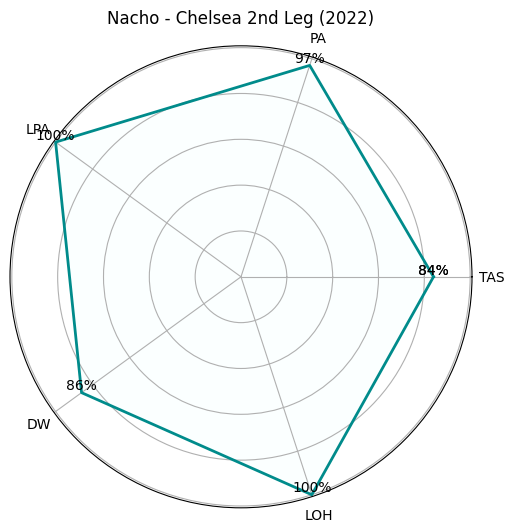

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'LOH'])
stats = np.array([84, 97, 100, 86, 100])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Nacho - Chelsea 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='azure', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='darkcyan', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Man City 1st Leg 2022 - Nacho Performance

- Total Action Success Success(TAS): 78 %

- Pass Accuracy (PA): (64-60) -> 91 %

- Long Passes Accurate(LPA): 0 %

- Duels won (DW): (11-6) -> 33 %

- Aerial Duels Won(ADW): 0 %

- Own Losses (LOH): (5-4) -> 100 %

- Recoveries (ROPH): 0 %

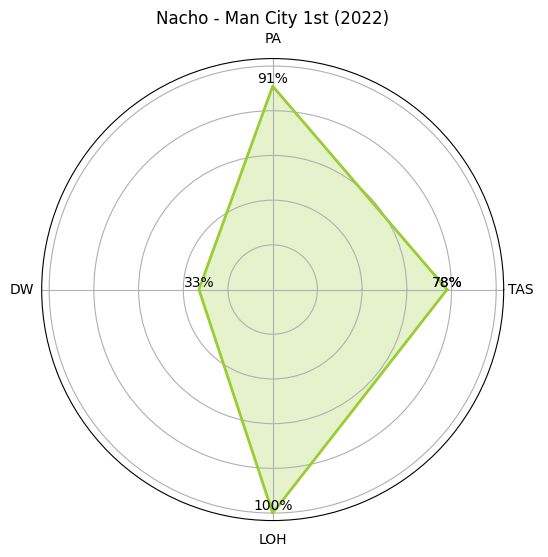

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS ', 'PA', 'DW', 'LOH'])
stats = np.array([78, 91, 33, 100])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Nacho - Man City 1st (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='yellowgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='yellowgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Man City 2nd Leg 2022 - Nacho Performance

- Total Action Success Success(TAS):(81-67) -> 83 %

- Pass Accuracy (PA): (64-60) -> 94 %

- Long Passes Accurate(LPA): (5-3) -> 60 %

- Duels won (DW): (11-6) -> 55 %

- Aerial Duels Won(ADW): (2-1) -> 50 %

- Own Losses (LOH): (5-4) -> 80 %

- Recoveries (ROPH): (14-1) -> 7 %

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS ', 'PA ', 'LPA', 'DW', 'ADW','LOH', 'ROPH'])
stats = np.array([83, 94, 60, 55, 50, 80, 7])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Nacho - Man City 2nd (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='yellowgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='yellowgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Liverpool City 1st Leg 2023 - Nacho Performance

- Total Action Successful (TAS):(67-41) -> 61 %

- Pass Accuracy (PA): (34-29) -> 85 %

- Long Passes Accurate (LPA): (2-2) -> 100 %

- Duels won (DW): (19-9) -> 50 %

- Aerial Duels Won (ADW): (1-1) -> 100 %

- Own Losses (LOH): (9-5) -> 56 %

- Recoveries (ROPH): (10-1) -> 10 %

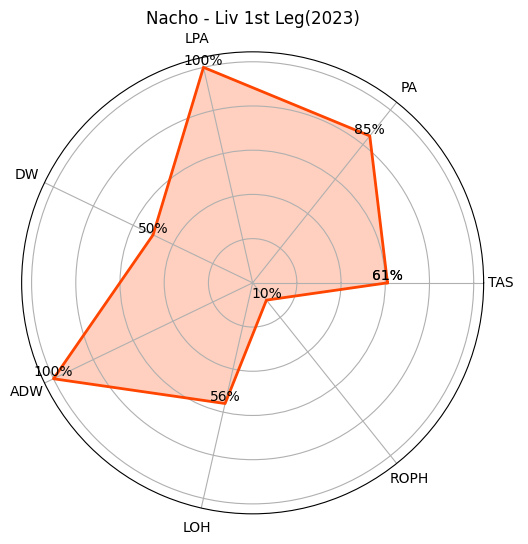

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS ', 'PA', 'LPA', 'DW', 'ADW','LOH', 'ROPH'])
stats = np.array([61, 85, 100, 50, 100, 56, 10])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Nacho - Liv 1st Leg(2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='orangered', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='orangered', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Liverpool City 2nd Leg 2023 - Nacho Performance

- Total Action Successful (TAS): 68 %

- Pass Accuracy (PA): 86 %

- Long Passes Accurate (LPA): 50 %

- Duels won (DW): (19-9) -> 48 %

- Aerial Duels Won (ADW): 0 %

- Own Losses (LOH): 60 %

- Recoveries (ROPH): 17 %

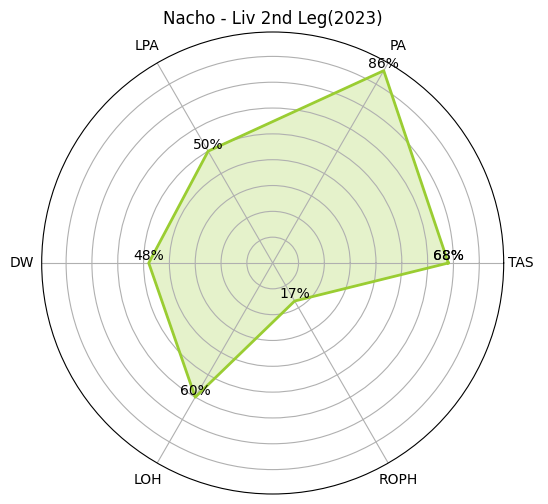

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS ', 'PA', 'LPA', 'DW','LOH', 'ROPH'])
stats = np.array([68, 86, 50, 48, 60, 17])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Nacho - Liv 2nd Leg(2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='yellowgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='yellowgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

In [ ]:
df

match                    competition  \
0       Real Madrid - Manchester City 1:1  Europe. UEFA Champions League   
1               Chelsea - Real Madrid 0:2  Europe. UEFA Champions League   
2             Real Madrid - Liverpool 1:0  Europe. UEFA Champions League   
3             Liverpool - Real Madrid 2:5  Europe. UEFA Champions League   
4                Real Madrid - Celtic 5:1  Europe. UEFA Champions League   
5            RB Leipzig - Real Madrid 3:2  Europe. UEFA Champions League   
6      Shakhtar Donetsk - Real Madrid 1:1  Europe. UEFA Champions League   
7            Real Madrid - RB Leipzig 2:0  Europe. UEFA Champions League   
8   Real Madrid - Manchester City 3:1 (E)  Europe. UEFA Champions League   
9       Manchester City - Real Madrid 4:3  Europe. UEFA Champions League   
10          Real Madrid - Chelsea 2:3 (E)  Europe. UEFA Champions League   
11              Chelsea - Real Madrid 1:3  Europe. UEFA Champions League   
12                  Real Madrid - PSG 3:1  Europe. UEFA Champions League   
13              Sheriff - Real Madrid 0:3  Europe. UEFA Champions League   
14     Real Madrid - Shakhtar Donetsk 2:1  Europe. UEFA Champions League   
15              Real Madrid - Sheriff 1:2  Europe. UEFA Champions League   
16       Internazionale - Real Madrid 0:1  Europe. UEFA Champions League   
17              Chelsea - Real Madrid 2:0  Europe. UEFA Champions League   
18              Real Madrid - Chelsea 1:1  Europe. UEFA Champions League   
19            Liverpool - Real Madrid 0:0  Europe. UEFA Champions League   
20            Real Madrid - Liverpool 3:1  Europe. UEFA Champions League   
21             Real Madrid - Atalanta 3:1  Europe. UEFA Champions League   
22             Atalanta - Real Madrid 0:1  Europe. UEFA Champions League   

        date position  minutes_played  total_actions  \
0     5/9/23        0               7             11   
1    4/18/23       RB              12              9   
2    3/15/23       LB              96             78   
3    2/21/23       LB              69             67   
4    11/2/22      LCB              24             16   
5   10/25/22  LB, LCB              68             50   
6   10/11/22      LCB             101             77   
7    9/14/22      LCB              94             94   
8     5/4/22  CB, LCB             134             81   
9    4/26/22      LCB              49             27   
10   4/12/22      RCB              88             44   
11    4/6/22      RCB              32             17   
12    3/9/22  LB, LCB              96             55   
13  11/24/21      LCB              30             26   
14   11/3/21       RB              28             26   
15   9/28/21       RB              65             59   
16   9/15/21       LB              94             86   
17    5/5/21     LCB3              95            104   
18   4/27/21     LCB3              94             95   
19   4/14/21      LCB              96             63   
20    4/6/21      LCB              95             53   
21   3/16/21     LCB3              95             72   
22   2/24/21      LCB              96            103   

    total_actions_successful  TAS_percent  goals  assists  ...  aerial_duels  \
0                         10           91      0        0  ...             0   
1                          9          100      0        0  ...             0   
2                         53           68      0        0  ...             1   
3                         41           61      0        0  ...             1   
4                         14           88      0        0  ...             0   
5                         40           80      0        0  ...             0   
6                         55           71      0        0  ...             6   
7                         82           87      0        0  ...             1   
8                         67           83      0        0  ...             2   
9                         21           78      0        0  ...    

### Chelsea 2nd Leg 2023 - Nacho Performance

- Total Action Successful (TAS): 100 %

- Pass Accuracy (PA): 100 %

- Long Passes Accurate (LPA): 0 %

- Duels won (DW): (19-9) -> 100 %

- Aerial Duels Won (ADW):  0 %

- Own Losses (LOH):  0 %

- Recoveries (ROPH): 0 %

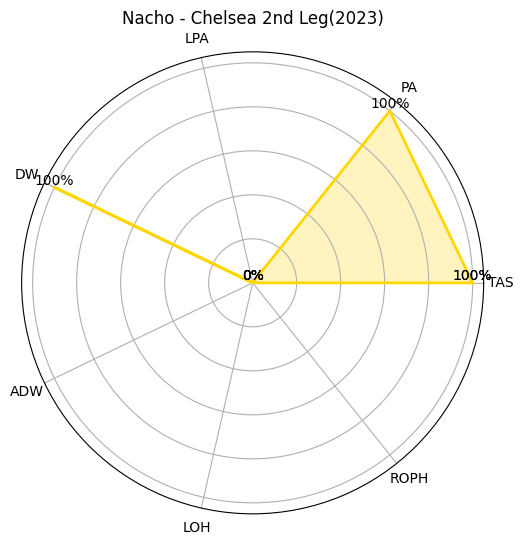

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS ', 'PA', 'LPA', 'DW', 'ADW','LOH', 'ROPH'])
stats = np.array([100, 100, 0, 100, 0, 0, 0])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Nacho - Chelsea 2nd Leg(2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='gold', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='gold', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Man City 1st Leg 2nd Leg 2023 - Nacho Performance

- Total Action Successful (TAS): 91 %

- Pass Accuracy (PA): 100 %

- Long Passes Accurate (LPA): 0 %

- Duels won (DW): (19-9) -> 100 %

- Aerial Duels Won (ADW): 0 %

- Own Losses (LOH): 60 %

- Recoveries (ROPH): 17 %

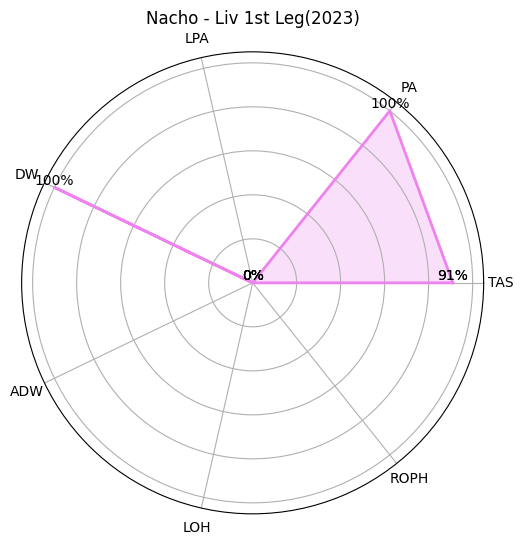

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS ', 'PA', 'LPA', 'DW', 'ADW','LOH', 'ROPH'])
stats = np.array([91, 100, 00, 100, 0, 0, 0])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Nacho - Liv 1st Leg(2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='violet', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='violet', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c25ecd7a-6196-46ab-a014-4d421a3172a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>